 
# Introduction

A `raster` is a spatial (geographic) data structure that divides the space into elements of equal size (in units of the coordinate reference system) called `cells`. Cells have a square or rectangular shape and can store one or more values. Raster are also sometimes referred to as `grids` and cells as `pixels`. Rasters represent spatial data as a continuous. Raster are therefore in sharp contrast with the other main structure used to store and manipulate geographical data, `vectors`. Vectors represent discrete (i.e. object based) spatial data, such as points, lines, polygons.

The fundamental R package for working with spatial data in raster format is `raster`, originally developed by Robert J. Hijmans. The `raster` package provides classes and functions to create, read, manipulate and write raster data. In this tutorial we will describe and experiment with many of these classes and functions. A notable feature of this package is that it can work with very large spatial datasets that cannot be loaded into computer memory. Functions process these large datasets in chunks, without attempting to load all values into memory at once. `raster` has revolutionised the manipulation, geo-processing and analysis of raster data in R. More information on `raster` can be found in the package vignette [here]( https://cran.r-project.org/web/packages/raster/vignettes/Raster.pdf).
   
The `raster` package relies on the `rgdal` package to read, write, and geo-process raster data. `rgdal` provides bindings to the Geospatial Data Abstraction Library ('GDAL') and access to projection/transformation operations from the 'PROJ.4' library, both external to `rgdal`. It is also possible to call GDAL functionalities directly from R and the command line in a terminal (e.g. using the function `system()` in R). Many spatial software packages also use GDAL to read/write gridded spatial data (e.g. ArcGIS, QGIS, GRASS, etc.). More information on the GDAL can be found on [this link](https://www.gdal.org/) and more information in PROJ.4 can be found in [this link](https://proj4.org).
   

# Raster Classes

The `raster` package creates and uses objects of several new classes. The main new classes provided by this package are: `RasterLayer`, `RasterStack`, and `RasterBrick`. Objects in these three classes are collectively referred as `Raster*` objects. 

* `RasterLayer`: Object containing a single-layer raster. 

* `RasterStack`: Object containing a multi-layer (band) raster. It can ''virtually'' connect several raster objects written to different files or in memory and/or a few layers in a single file.

* `RasterBrick`: Object containing a multi-layer (band) raster. It is a truly multi-layered object. It can only be linked to a single multi-layer file (i.e. all data must be stored in a single file on disk) or is in itself a multi-layer object with data loaded in memory. Typical examples of multi-layered raster files are multi-band satellite images and rasters containing time series (e.g. each layer contains values for a different day or month).

RasterStack and RasterBrick objects are quite similar. However, RasterBricks have a shorter processing time than RasterStacks and RasterStacks are more flexible (e.g. with RasterStacks pixel-based calculations on separate raster layers can be performed).
   
In both multi-layered object classes, individual layers must have the same spatial extent and resolution. That is, individual layers must represent the same locations with the same level of detail.
 
In all 3 classes the data can be loaded in memory or on disk depending on the size of the grid(s). Raster objects are typically created from files, but even RasterBrick objects can exist entirely in memory.


# Preparation


In [1]:

# Load  Libraries
# ===============
library(ggplot2)
library(RColorBrewer)

library(sp)
library(rgdal)
library(ncdf4)
#library(RKEA)

library(raster)
library(rasterVis)

library(maps)
library(mapdata)
library(maptools)


# Clean up Memory
# ===============
rm(list=ls()) # WARNING: this will remove all objects in the *current* environment.


Warning message:
"package 'rgdal' was built under R version 3.5.3"rgdal: version: 1.4-3, (SVN revision 828)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/uqbblanc/Documents/R/R-3.5.1/library/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/uqbblanc/Documents/R/R-3.5.1/library/rgdal/proj
 Linking to sp version: 1.3-1 
Warning message:
"package 'ncdf4' was built under R version 3.5.3"Warning message:
"package 'raster' was built under R version 3.5.3"Loading required package: lattice
Loading required package: latticeExtra

Attaching package: 'latticeExtra'

The following object is masked from 'package:ggplot2':

    layer

Warning message:
"package 'maptools' was built under R version 3.5.3"Checking rgeos availability: TRUE



# Creating Rasters

Raster objects can be created in memory with these functions:

* `raster`: Creates a RasterLayer object.

* `stack`: Creates a RasterStack object from RasterLayer (i.e. individual layers) objects or from a muliti-layer (band) file. They can also be created from a SpatialPixelsDataFrame object or SpatialGridDataFrame object. Individual raster layers must have the same spatial extent and resolution.

* `brick`: Ceates a RasterBrick object from RasterLayer (i.e. individual layers) objects, a RasterStack, or from a muliti-layer (band) file. They can also be created from SpatialPixels*, SpatialGrid*, and Extent objects. Individual raster layers must have the same spatial extent and resolution.

First we create a frame that will contain the Raster* object. This object will have defined: Dimensions, Spatial Extent, Resolution, and a Coordinate Reference System (CRS)


[1] "RasterLayer"
attr(,"package")
[1] "raster"

[1] FALSE

class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 


[1] TRUE

class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 1  (min, max)


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 2, 2  (min, max)


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 100  (min, max)


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : -1.755711, 2.691293  (min, max)


[1] "RasterStack"
attr(,"package")
[1] "raster"

[1] 2

class       : RasterStack 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
names       : layer.1, layer.2 
min values  :       1,       2 
max values  :       1,       2 


[1] "RasterStack"
attr(,"package")
[1] "raster"

[1] 2

class       : RasterStack 
dimensions  : 10, 10, 100, 2  (nrow, ncol, ncell, nlayers)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
names       :    layer.1,    layer.2 
min values  :   1.000000,  -1.755711 
max values  : 100.000000,   2.691293 


[1] "RasterBrick"
attr(,"package")
[1] "raster"

[1] 2

class       : RasterBrick 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1, layer.2 
min values  :       1,       2 
max values  :       1,       2 


[1] 2

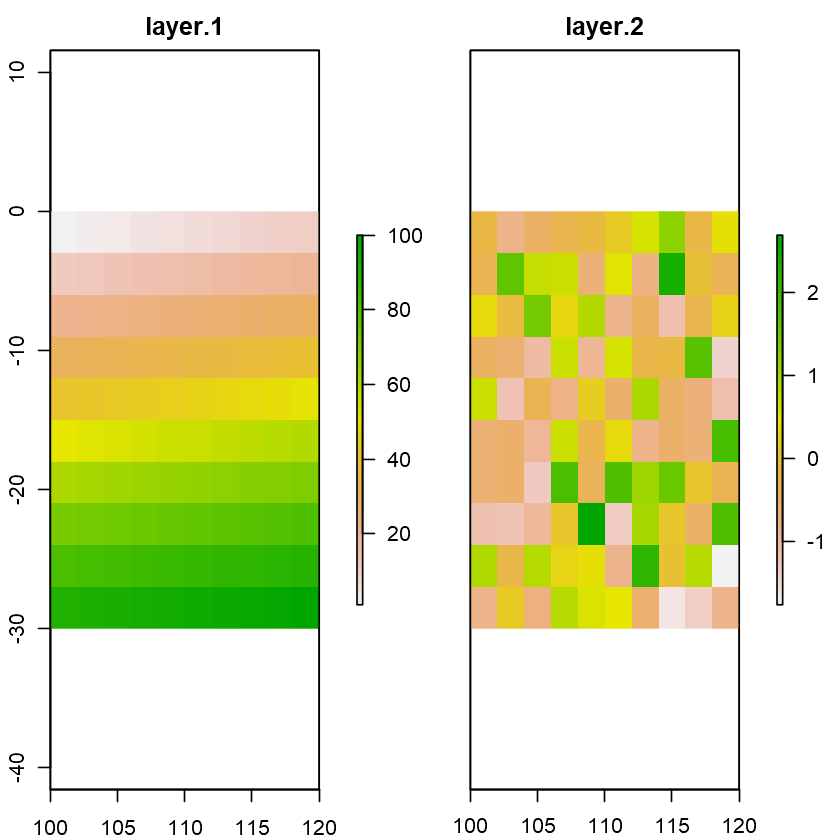

class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1 
values      : 1, 100  (min, max)


[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.2 
values      : -1.755711, 2.691293  (min, max)


[1] -0.205764934 -0.803264610 -0.485746849 -0.270913914 -0.139173657
  [6]  0.135716379  0.601824945  1.204594125 -0.190301734  0.417583570
 [11] -0.308807466  1.619249761  0.742283411  0.689791109 -0.657859756
 [16]  0.524082895 -0.747207585  2.411000845 -0.024176204 -0.345416716
 [21]  0.385242200 -0.126865414  1.437831740  0.320642642  0.883341051
 [26] -0.853180244 -0.435524803 -1.165709589 -0.261857366  0.260162975
 [31] -0.440504261 -0.572764485 -1.045180961  0.713554980 -0.923172841
 [36]  0.613966417 -0.209767400 -0.168951474  1.685728492 -1.440971980
 [41]  0.704955337 -1.200745388 -0.311676927 -0.795070973  0.190840516
 [46] -0.543504081  0.951371972 -0.501826037 -0.676941754 -1.143682971
 [51] -0.636188574 -0.546611339 -0.952316736  0.692569221 -0.250886312
 [56]  0.370890949 -0.804695004 -0.535984208 -0.630437524  1.869865697
 [61] -0.612992619 -0.522425227 -1.310068744  1.829121034 -0.366063028
 [66]  1.790484992  1.055537093  1.526495828  0.067424228 -0.324535363
 [71] -1.185425897 -1.226062023 -0.965690324  0.040025708  2.691292788
 [76] -1.329788046  0.973480988  0.069762373 -0.490557815  1.797894528
 [81]  0.904961665 -0.210624843  0.869312415  0.285426261  0.409184633
 [86] -0.843677595  2.156372713  0.001321761  0.845507977 -1.755710610
 [91] -0.807604667  0.127357917 -0.707384173  0.857214377  0.578470984
 [96]  0.493973669 -0.570876734 -1.631505000 -1.351813626 -0.822830792

[1] "layer"

[1] "r1a.c_Layer1"

[1] "layer.1" "layer.2"

[1] "s1.c_Layer1" "s1.c_Layer2"

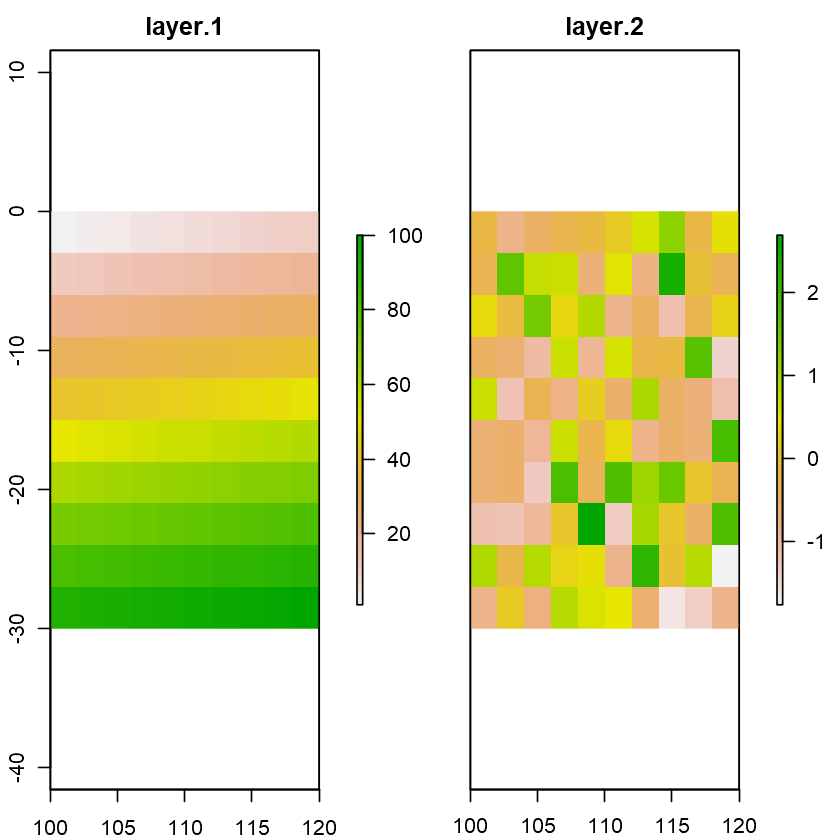

In [2]:

# Single Layer Rasters
# ====================

# Create the raster 'frame/skeleton/container'. Will have defined: Dimensions, Spatial Extent, 
# Resolution, and CRS.
r1a = r1b = raster(nrow=10, ncol=15)
r2a  = r2b = raster(nrow=10, ncol=10, xmn=100, xmx=120, ymn=-30, ymx=0)
class(r2a)
hasValues(r2a)
r1a; r1b; r2a; r2b

# Add contents (i.e. values) to the rasters
values(r1a) = 1   # OR: r1a[] = 1
values(r1b) = 2   # OR: r1b[] = 2
values(r2a) = 1:ncell(r2a) 
values(r2b)  = rnorm(n=ncell(r2b))
hasValues(r2a)
r1a; r1b; r2a; r2b


# Multiple- Layer Rasters
# =======================


# Stack
# -----
s1 = stack(r1a, r1b)
class(s1)
nlayers(s1)
s1

s2 = stack(r2a, r2b)
class(s2)
nlayers(s2)
s2
plot(s2)

# Remember: Individual Raster Layers must have the same extent
#sNoNo = stack(r1a,r2b)  # It doesn't work


# Brick
# -----

# From RasterLayer objects
b1 = brick(r1a, r1b)
class(b1)
nlayers(b1)
b1

# From a RasterStack object
b2 = brick(s2)
nlayers(b2)
plot(b2)

# Again: Individual Raster Layers must have the same extent
#bNoNo = brick(r1a,r2b)  # It doesn't work; but why not giving it a try?



# Create (i.e. Extract) a Single Layer Raster from a Multi-Layer Raster
# =====================================================================

# From  a RasterStack object
r2a.from.s2 = raster(s2, layer=1)
r2a.from.s2
r2a.from.s2[]

# From  a RasterBrick object
r2b.from.b2 = raster(b2, layer=2)
r2b.from.b2
r2b.from.b2[]


# Assigning names to raster layers
# =================================
# The function `names` can be used to assign and extract names to/from the layers of a Raster\* object.  

# For a single layer raster object
r1a.c = r1a
names(r1a.c) = c("r1a.c_Layer1")
names(r1a); names(r1a.c)

# For a multi=layer raster object
s1.c = s1
names(s1.c) = c("s1.c_Layer1", "s1.c_Layer2")
names(s1); names(s1.c)



## Adding, Dropping, and Subsetting Layers

`addLayer`: Adds one or more layers to a Raster\* object. The object returned is a RasterStack (unless nothing to add or drop was provided, in which case the original object is returned).


`dropLayer`: Drops one or more layers from a RasterStack or RasterBrick object.

* A layer cannot be dropped from a RasterLayer object (makes sense).
* If the multi-layer object has > 2 layers it returns an object of the same type, 
* If the multi-layer object has 2 layers it returns a RasterLayer object.

`Subset`: In addition of using the function `raster` to extracts a layer or subset of layers from a RasterStack or RasterBrick object the function `subset` can also be used for to achieve tis task. The argument `subset` is an integer or character indicating the layers to extract. If a single layer is selected and the argument `drop`:

* `drop=TRUE`: The returned object would be of class RasterLayer.
* `drop=FALSE``: The returned object would be the same as that in the original raster object (i.e. RasterStack or RasterBrick).


In [3]:

# Adding Layers
# -------------
# It always returns a RasterStak object

# Adding to a RasterLayer object
s1.aL2 = addLayer(r1a, r1b) # = to 'stack(r1a,r2b)'
r1a; s1.aL2

# Adding to a RasterStack object
s1.aL3 = addLayer(s1, r1a) 
s1; s1.aL3

# Adding to a RasterBrick object
s1.aL4 = addLayer(b1, r1a, r1b)
b1; s1.aL4


# Dropping Layers
# ---------------
# It always returns a RasterStak object

# Dropping from a RasterLayer object
dim(r1a)
#s1.dL0 = dropLayer(r1a, i=1)  # It doesn't work (cannot drop a layer from a RasterLayer object); but why not giving it a try!
# r1a; s1.dL02

# Dropping from a RasterStack object
s.dL2 = dropLayer(s1.aL4, i=c(2,4)) 
s1.aL4; s.dL2

# Dropping from a RasterBrick object
  # Dropping from a > 2 Layers brick returns a 'RasterStack' object
b1.aL3 = brick(addLayer(s1, r1a))
b1.aL3
s.aL2 = dropLayer(b1.aL3, i=3)
b1.aL3; s.aL2
  # Dropping from a 2 Layers brick returns a 'RasterLayer' object
s.dL1 = dropLayer(b1, i=1)
b1; s.dL1


# Subsetting Layers
# -----------------

dim(s1.aL4)
names(s1.aL4)

# Subset multiple ayers
s1.aL4.s1n2 = subset(s1.aL4, subset=1:2)
dim(s1.aL4.s1n2)
names(s1.aL4.s1n2)

# Subset a single layer
  # drop=TRUE
s1.aL4.s3dT = subset(s1.aL4, subset="layer.1.2",drop=TRUE)
dim(s1.aL4.s3dT)
names(s1.aL4.s3dT)
class(s1.aL4.s3dT)
  # drop=FALSE
s1.aL4.s3dF = subset(s1.aL4, subset=3,drop=FALSE)
dim(s1.aL4.s3dF)
names(s1.aL4.s3dF)
class(s1.aL4.s3dF)


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 1  (min, max)


class       : RasterStack 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
names       : layer.1, layer.2 
min values  :       1,       2 
max values  :       1,       2 


class       : RasterStack 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
names       : layer.1, layer.2 
min values  :       1,       2 
max values  :       1,       2 


class       : RasterStack 
dimensions  : 10, 15, 150, 3  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
names       : layer.1, layer.2, layer 
min values  :       1,       2,     1 
max values  :       1,       2,     1 


class       : RasterBrick 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1, layer.2 
min values  :       1,       2 
max values  :       1,       2 


class       : RasterStack 
dimensions  : 10, 15, 150, 4  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
names       : layer.1.1, layer.2.1, layer.1.2, layer.2.2 
min values  :         1,         2,         1,         2 
max values  :         1,         2,         1,         2 


[1] 10 15  1

class       : RasterStack 
dimensions  : 10, 15, 150, 4  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
names       : layer.1.1, layer.2.1, layer.1.2, layer.2.2 
min values  :         1,         2,         1,         2 
max values  :         1,         2,         1,         2 


class       : RasterStack 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
names       : layer.1.1, layer.1.2 
min values  :         1,         1 
max values  :         1,         1 


class       : RasterBrick 
dimensions  : 10, 15, 150, 3  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1, layer.2, layer 
min values  :       1,       2,     1 
max values  :       1,       2,     1 


class       : RasterBrick 
dimensions  : 10, 15, 150, 3  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1, layer.2, layer 
min values  :       1,       2,     1 
max values  :       1,       2,     1 


class       : RasterBrick 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1, layer.2 
min values  :       1,       2 
max values  :       1,       2 


class       : RasterBrick 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1, layer.2 
min values  :       1,       2 
max values  :       1,       2 


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.2 
values      : 2, 2  (min, max)


[1] 10 15  4

[1] "layer.1.1" "layer.2.1" "layer.1.2" "layer.2.2"

[1] 10 15  2

[1] "layer.1" "layer.2"

[1] 10 15  1

[1] "layer.1"

[1] "RasterLayer"
attr(,"package")
[1] "raster"

[1] 10 15  1

[1] "layer.1"

[1] "RasterStack"
attr(,"package")
[1] "raster"


# Loading and Saving Rasters


In [4]:


# Choose a Directory where to store the save raster file: 
# my.file.path = "C:\\Users\\uqbblanc\\Documents\\TERN\\CWDir"
my.file.path = getwd()



## Saving Rasters

We can use two functions:

* `writeRaster`:  Writes an entire Raster* object to a file in a supported format.
* `writeValues`: Writes chucks (e.g. by row) of a Raster* object to a file in a supported format.


Supported formats include (in parenthesis is the file extension for the format). The last 3 formats cannot store Multi-band rasters. See help on 'writeRaster' and 'writeFormat' for further details:

* native R 'raster' package format (.grd): It conserves the original file names in the individual band names.
* netCDF (.nc): Requires the library `ncdf4`.
* GeoTiff (.tif): Requires the library `rgdal`.
* ENVI .hdr labelled (.envi),
* ESRI hdr. labelled (.bil)
* Erdas Imagine Images (.img)
* ESRI ASCII (.asc)
* SAGA GIS (.sdat), 
* IDRISI (.rst).


If argument `prj` is TRUE, the CRS is written to a '.prj' file. This can be useful when writing to a file type that does not store the crs, such as ASCII files. 


For multi-layer rasters (RasterStack and RasterBrick objects), individual layers can be stored in the same file or in separate files. When argument `bylayer` is TRUE, layers are saved to separate files. In this case, to name the separate files the user provide naming directions using the argument 'suffix': 

* A vector with filenames, with as many file names as layers (i.e. names(x))
* A single filename that will get a unique suffix (i.e. a number between 1 and nlayers(x))


In [5]:

# Single layer raster (RasterLayer object)
# ----------------------------------------

# Save a single Layer from a single layer raster (RasterLayer object) in GeoTiff format (requires library 'rgdal')
writeRaster(r2a, filename=paste(my.file.path,"r2a.tif",sep="\\"), format="GTiff", overwrite=TRUE)



# Multi-layer rasters (RasterStack and RasterBrick objects)
# ---------------------------------------------------------

# Save all layers of a RasterStack object in a single file in netCDF format (requires library 'ncdf4')
writeRaster(s2, filename=paste(my.file.path,"s2.nc",sep="\\"), format="CDF", overwrite=TRUE)


# Save individual layers of a RasterBrick object in separate files in native R 'raster' package format
writeRaster(b2,  filename=paste(my.file.path,"b2.grd",sep="\\"),  format="raster", overwrite=TRUE, 
                   bylayer=TRUE)



## Loading Rasters

Loading rasters is done with the same functions that are used to create them from data (i.e. `raster`, `stack`, and `brick`).

Note that when extracting a single layer from a multi-layer raster:

* Argument `layer`is used for extracting the layer from a RasterStack or RasterBrick object or a File.
* Argument `band` is used for extracting the layer from a File (exclusively).


In [6]:

# Single layer raster (RasterLayer object)
# ----------------------------------------


# Load single Layer from a single layer file
r2a.from.r2a.tif = raster(paste(my.file.path,"r2a.tif",sep="\\"))
hasValues(r2a.from.r2a.tif)
inMemory(r2a.from.r2a.tif)
r2a.from.r2a.tif
r2a.from.r2a.tif[]


# Load single Layer from a multi-layer file
 
# Layer 1, using argument 'layer'
r2a.from.s2.nc = raster(paste(my.file.path,"s2.nc",sep="\\"), layer=1)
hasValues(r2a.from.s2.nc)
inMemory(r2a.from.s2.nc)
r2a.from.s2.nc
r2a.from.s2.nc[]

# Layer 2, using argument 'band'
r2b.from.s2.nc = raster(paste(my.file.path,"s2.nc",sep="\\"), band=2)
hasValues(r2b.from.s2.nc)
inMemory(r2b.from.s2.nc)
r2b.from.s2.nc
r2b.from.s2.nc[]


# Multi-layer raster
# ------------------

# stack (RasterStack object)
s2.from.s2.nc = stack(paste(my.file.path,"s2.nc",sep="\\"))
hasValues(s2.from.s2.nc)
inMemory(s2.from.s2.nc)
s2.from.s2.nc
head(s2.from.s2.nc[])

# brick (RasterBrick object)
  # From b2.grd: Cannot open it because layers were saved in separated files
# b2.from.b2.grd = brick(paste(my.file.path,"b2.grd",sep="\\"))  
  # From s2.nc
b2.from.s2.grd = brick(paste(my.file.path,"s2.nc",sep="\\"))
hasValues(b2.from.s2.grd)
inMemory(b2.from.s2.grd)
b2.from.s2.grd
head(b2.from.s2.grd[])


[1] TRUE

[1] FALSE

class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : C:/Users/uqbblanc/Documents/TERN/04b-DSDP_GitHub/Prep/Landscapes_AusCover-RemoteSensing/UsingRasterDatainR/r2a.tif 
names       : r2a 
values      : 1, 100  (min, max)


[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

[1] TRUE

[1] FALSE

class       : RasterLayer 
band        : 1  (of  2  bands)
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : C:/Users/uqbblanc/Documents/TERN/04b-DSDP_GitHub/Prep/Landscapes_AusCover-RemoteSensing/UsingRasterDatainR/s2.nc 
names       : variable 
z-value     : 1 
zvar        : variable 


[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

[1] TRUE

[1] FALSE

class       : RasterLayer 
band        : 2  (of  2  bands)
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : C:/Users/uqbblanc/Documents/TERN/04b-DSDP_GitHub/Prep/Landscapes_AusCover-RemoteSensing/UsingRasterDatainR/s2.nc 
names       : variable 
z-value     : 2 
zvar        : variable 


[1] -0.205764934 -0.803264618 -0.485746861 -0.270913929 -0.139173657
  [6]  0.135716379  0.601824939  1.204594135 -0.190301731  0.417583585
 [11] -0.308807462  1.619249821  0.742283404  0.689791083 -0.657859743
 [16]  0.524082899 -0.747207582  2.411000729 -0.024176205 -0.345416725
 [21]  0.385242194 -0.126865417  1.437831759  0.320642650  0.883341074
 [26] -0.853180230 -0.435524791 -1.165709615 -0.261857361  0.260162979
 [31] -0.440504253 -0.572764456 -1.045180917  0.713554978 -0.923172832
 [36]  0.613966405 -0.209767401 -0.168951482  1.685728550 -1.440971971
 [41]  0.704955339 -1.200745344 -0.311676919 -0.795070946  0.190840513
 [46] -0.543504059  0.951371968 -0.501826048 -0.676941752 -1.143682957
 [51] -0.636188567 -0.546611309 -0.952316761  0.692569196 -0.250886321
 [56]  0.370890945 -0.804695010 -0.535984218 -0.630437553  1.869865656
 [61] -0.612992644 -0.522425234 -1.310068727  1.829120994 -0.366063029
 [66]  1.790485024  1.055537105  1.526495814  0.067424230 -0.324535370
 [71] -1.185425878 -1.226062059 -0.965690315  0.040025707  2.691292763
 [76] -1.329788089  0.973480999  0.069762371 -0.490557820  1.797894478
 [81]  0.904961646 -0.210624844  0.869312406  0.285426259  0.409184635
 [86] -0.843677580  2.156372786  0.001321761  0.845507979 -1.755710602
 [91] -0.807604671  0.127357915 -0.707384169  0.857214391  0.578471005
 [96]  0.493973672 -0.570876718 -1.631505013 -1.351813674 -0.822830796

[1] TRUE

[1] FALSE

class       : RasterStack 
dimensions  : 10, 10, 100, 2  (nrow, ncol, ncell, nlayers)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
names       : X1, X2 


X1,X2
1,-0.2057649
2,-0.8032646
3,-0.4857469
4,-0.2709139
5,-0.1391737
6,0.1357164


[1] TRUE

[1] FALSE

class       : RasterBrick 
dimensions  : 10, 10, 100, 2  (nrow, ncol, ncell, nlayers)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : C:/Users/uqbblanc/Documents/TERN/04b-DSDP_GitHub/Prep/Landscapes_AusCover-RemoteSensing/UsingRasterDatainR/s2.nc 
names       : X1, X2 
unknown     : 1, 2 
varname     : variable 


X1,X2
1,-0.2057649
2,-0.8032646
3,-0.4857469
4,-0.2709139
5,-0.1391737
6,0.1357164



# Navigating Rasters

To navegate rasters we use raster navigation functions, also known as 'helper' functions.

Dichotomy: A RasterLayer can be accessed both as a Matrix (via cell row and column numbers) and as a Vector (via cell number).

* _Conceptually_: Easier to think of a RasterLayer as a matrix.
* _In pratice_: Commonly treated as a vector, constituted by the RasterLayer cells from top-left corner to bottom-right ordered by row. 

Except `dim` and `names`, which is not really Helper Function, all functions return the same results for uni-layer and multi-layer objects (compose of layers of the same characteristics than the single layer).


### Dimensions of a raster


In [7]:

# Dimension of a raster
dim(r1a); dim(s1); dim(b1)


[1] 10 15  1

[1] 10 15  2

[1] 10 15  2


### Names of raster


In [8]:

# Get the names of the layers of a raster object 
# (it can also be used to set the layers names, see "Assigning names to raster layers").
names(r1a); names(s1); names(b1)


[1] "layer"

[1] "layer.1" "layer.2"

[1] "layer.1" "layer.2"


### Number of rows, columns, and cells


In [9]:

# Number of rows, columns, and cells
nrow(r1a); nrow(s1); nrow(b1)
ncol(r1a); ncol(s1); ncol(b1)
ncell(r1a); ncell(s1); ncell(b1)
nlayers(r1a); nlayers(s1); nlayers(b1)


[1] 10

[1] 10

[1] 10

[1] 15

[1] 15

[1] 15

[1] 150

[1] 150

[1] 150

[1] 1

[1] 2

[1] 2


### Mapping Cells 


In [10]:

# Mapping cells
 # From Vector format to Matrix format
rowFromCell(r1a, 30); rowFromCell(s1, 30); rowFromCell(b1, 30)
colFromCell(r1a, 30); colFromCell(s1, 30); colFromCell(b1, 30)
 # From Matrix format to Vector format
cellFromRowCol(r1a, 2, 5); cellFromRowCol(s1, 2, 5); cellFromRowCol(b1, 2, 5)
cellFromRowCol(r2a, row=1:2, col=1:3); cellFromRowCol(s2, row=1:2, col=1:3); cellFromRowCol(b2, row=1:2, col=1:3)  # Returns cell numbers for each row/col pair (i.e 1,1; 2,2; 1,3)
cellFromRowColCombine(r2a, rownr=1:2, colnr=1:3); cellFromRowColCombine(b2, rownr=1:2, colnr=1:3); cellFromRowColCombine(s2, rownr=1:2, colnr=1:3)  # Returns cell numbers for all row/col pairs (1,1; 1,2;....;2,3)


[1] 2

[1] 2

[1] 2

[1] 15

[1] 15

[1] 15

[1] 20

[1] 20

[1] 20

[1]  1 12  3

[1]  1 12  3

[1]  1 12  3

[1]  1  2  3 11 12 13

[1]  1  2  3 11 12 13

[1]  1  2  3 11 12 13


### Coordinates for the center of raster cells


In [11]:

# Coordinates for the center of raster cells
 # Coordinates from Columns (1 column or more)
xFromCol(r1a,1); xFromCol(s1,1); xFromCol(b1,1)
xFromCol(r1a,14:15); xFromCol(s1,14:15); xFromCol(b1,14:15)
 # Coordinates from Rows (1 row or more)
xFromCol(r1a,1); xFromCol(s1,1); xFromCol(b1,1)
xFromCol(r1a, 9:10); xFromCol(s1, 9:10); xFromCol(b1, 9:10)
 # Coordinates from Cells
xyFromCell(r1a,1); xyFromCell(s1,1); xyFromCell(b1,1)   # First cell
xyFromCell(r1a, ncell(r1a)); xyFromCell(s1, ncell(s1)); xyFromCell(b1, ncell(b1))  # Last cell
 # Longitude only
xFromCell(r1a,1); xFromCell(s1,1); xFromCell(b1,1)  # First cell
 # Latitude only
yFromCell(r1a, ncell(r1a)); yFromCell(s1, ncell(s1)); yFromCell(b1, ncell(b1))  # Last cell


[1] -168

[1] -168

[1] -168

[1] 144 168

[1] 144 168

[1] 144 168

[1] -168

[1] -168

[1] -168

[1] 24 48

[1] 24 48

[1] 24 48

x,y
-168,81


x,y
-168,81


x,y
-168,81


x,y
168,-81


x,y
168,-81


x,y
168,-81


[1] -168

[1] -168

[1] -168

[1] -81

[1] -81

[1] -81


### Columns, Rows, and Cells from Coordinates (at the centre of cells)


In [12]:

# Columns, Rows, and Cells from Coordinates (at centre of cells)
colFromX(r1a, 90) # 12
rowFromY(r1a, -45) # 8
cellFromXY(r1a, cbind(90,-45))  # 117 = 7 * 15 + 12; ncol(r1a) = 15


[1] 12

[1] 8

[1] 117


# Examining Raster Contents

In this section we will examine the contents (i.e. values) of each cell in the raster. The methods to summarize this contents are described in the next section. 

## Examining raster contents numerically

### Single Layer (RasterLayer) Objects


In [13]:

# By cell position
# ................

# All values
r2a[]
values(r2a)
getValues(r2a)

# Particular cells
r2a[1,1]; r2a[10,10]
#values(r2a[1]); values(r2a[1,1])  # WRONG: It doesn't work; but why not giving it a try? 
#getValues(r2a[1]); getValues(r2a[1,1]) # WRONG: It doesn't work; but why not giving it a try?

# Values of a row
r2a[2,]
getValues(r2a, row=2) # RIGHT: It works ONLY for Rows (not individual Cells or Columns)

# Values of a column
r2a[,3]
#getValues(r2a, col=3)  # WRONG: It doesn't work

# Values of a block (rectangle) of cellsgetValuesBlock
getValuesBlock(r2a, row=1, nrows=2, col=1, ncols=3)
extract(r2a, cellFromRowColCombine(r2a, rownr=1:2, colnr=1:3))

# By coordinates
# ..............
# Extract returns raster cells values from both cell indices and cell coordinates.
cells.indices = cellFromRowColCombine(r2a, rownr=1:2, colnr=1:3)
cells.coords = xyFromCell(r2a, cells.indices)
cells.indices
cells.coords
extract(r2a, cells.indices)
extract(r2a, cells.coords)


[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

[1] 1

[1] 100

[1] 11 12 13 14 15 16 17 18 19 20

[1] 11 12 13 14 15 16 17 18 19 20

[1]  3 13 23 33 43 53 63 73 83 93

[1]  1  2  3 11 12 13

[1]  1  2  3 11 12 13

[1]  1  2  3 11 12 13

x,y
101,-1.5
103,-1.5
105,-1.5
101,-4.5
103,-4.5
105,-4.5


[1]  1  2  3 11 12 13

[1]  1  2  3 11 12 13


### Multi-Layer (RasterStack and RasterBrick) Objects

For multi-layer rasters the procedures are analogous to those obtained for single-layers rasters, but results include the relevant values for all the layers in the object. 

RasterStack and RasterBrick objects would return the same results if their contents are equal (e.g. s2 & b2 return the same results)


In [14]:

# By cell position
# ................

# All values
head(s2[])
head(values(s2))
head(getValues(s2))

# Particular cells
s2[1,1]; s2[10,10]
#values(s2[1]); values(s2[1,1])   # WRONG: It doesn't work; but why not giving it a try?
#getValues(s2[1]); getValues(s2[1,1])   # WRONG: It doesn't work; but why not giving it a try?

# Values of a row
s2[2,]
getValues(s2, row=2)

# Values of a column
s2[,3]
#getValues(s2, col=3)     # WRONG: It doesn't work; but why not giving it a

# Values of a block (rectangle) of cellsgetValuesBlock
getValuesBlock(s2, row=1, nrows=2, col=1, ncols=3)
extract(s2, cellFromRowColCombine(s2, rownr=1:2, colnr=1:3))

# By coordinates
# ....................
# Extract returns raster cells values from both cell indices and cell coordinates.
cells.indices = cellFromRowColCombine(s2, rownr=1:2, colnr=1:3)
cells.coords = xyFromCell(s2, cells.indices)
cells.indices
cells.coords
extract(s2, cells.indices)
extract(s2, cells.coords)


layer.1,layer.2
1,-0.2057649
2,-0.8032646
3,-0.4857468
4,-0.2709139
5,-0.1391737
6,0.1357164


layer.1,layer.2
1,-0.2057649
2,-0.8032646
3,-0.4857468
4,-0.2709139
5,-0.1391737
6,0.1357164


layer.1,layer.2
1,-0.2057649
2,-0.8032646
3,-0.4857468
4,-0.2709139
5,-0.1391737
6,0.1357164


layer.1,layer.2
1,-0.2057649


layer.1,layer.2
100,-0.8228308


layer.1,layer.2
11,-0.3088075
12,1.6192498
13,0.7422834
14,0.6897911
15,-0.6578598
16,0.5240829
17,-0.7472076
18,2.4110008
19,-0.0241762
20,-0.3454167


layer.1,layer.2
11,-0.3088075
12,1.6192498
13,0.7422834
14,0.6897911
15,-0.6578598
16,0.5240829
17,-0.7472076
18,2.4110008
19,-0.0241762
20,-0.3454167


layer.1,layer.2
3,-0.4857468
13,0.7422834
23,1.4378317
33,-1.0451810
43,-0.3116769
53,-0.9523167
63,-1.3100687
73,-0.9656903
83,0.8693124
93,-0.7073842


layer.1,layer.2
1,-0.2057649
2,-0.8032646
3,-0.4857468
11,-0.3088075
12,1.6192498
13,0.7422834


layer.1,layer.2
1,-0.2057649
2,-0.8032646
3,-0.4857468
11,-0.3088075
12,1.6192498
13,0.7422834


[1]  1  2  3 11 12 13

x,y
101,-1.5
103,-1.5
105,-1.5
101,-4.5
103,-4.5
105,-4.5


layer.1,layer.2
1,-0.2057649
2,-0.8032646
3,-0.4857468
11,-0.3088075
12,1.6192498
13,0.7422834


layer.1,layer.2
1,-0.2057649
2,-0.8032646
3,-0.4857468
11,-0.3088075
12,1.6192498
13,0.7422834



## Visualising raster contents

Rasters can be visualised using the function `plot` in the package `raster`. Even better visualisations can be easily achieved with the function `levelplot` in the package `rasterVis`.

### Single Layer (RasterLayer) Objects


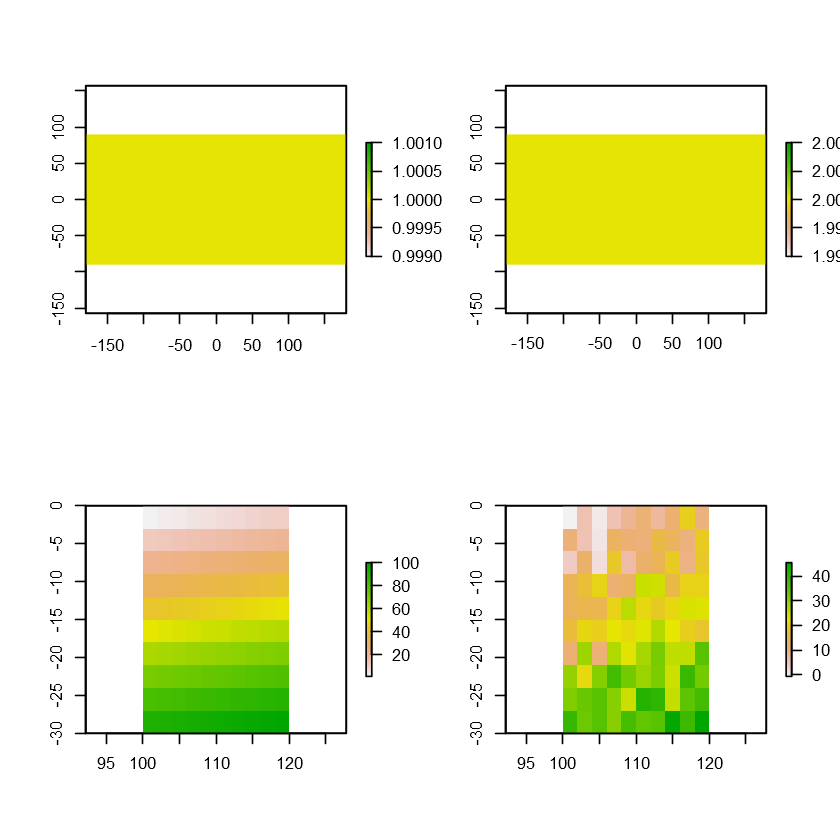

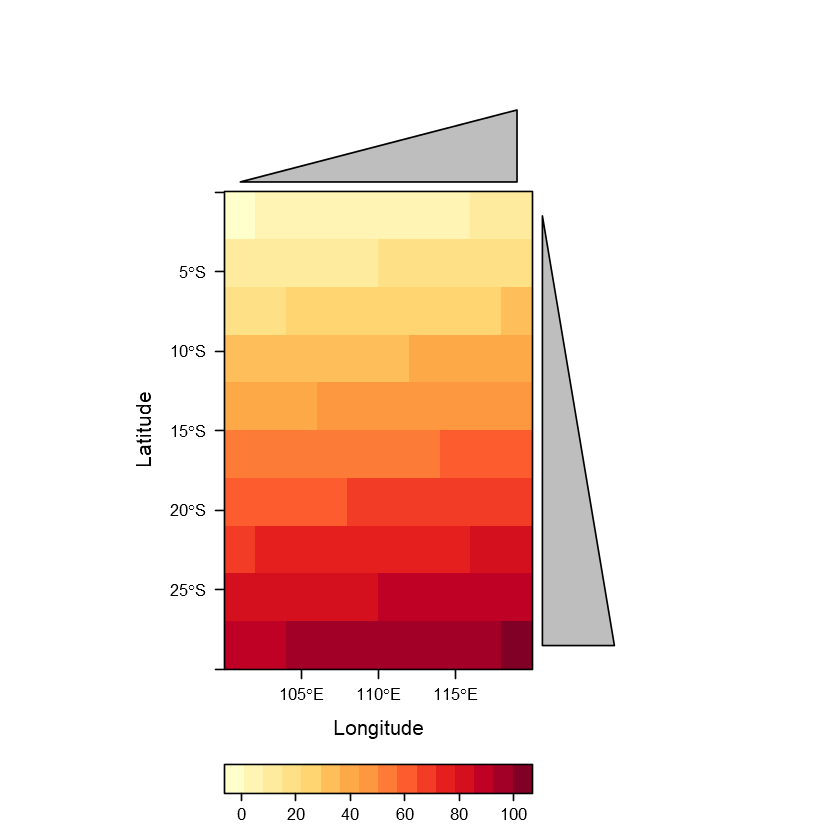

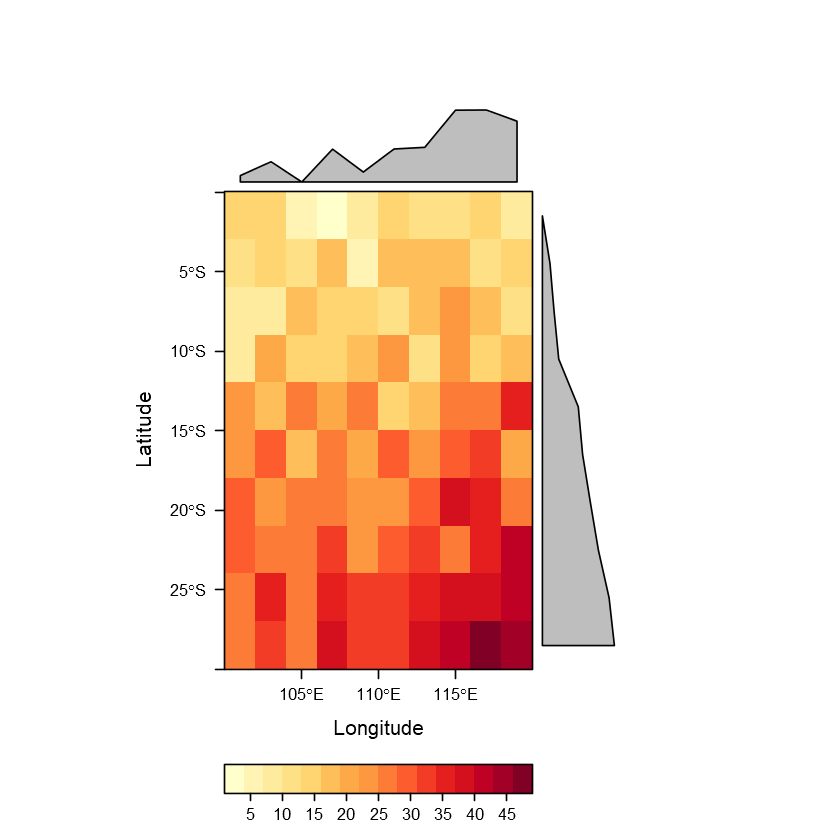

In [18]:

# Basic plot
par(mfrow=c(2,2))
plot(r1a)
plot(r1b)
plot(r2a)
plot(r2b)


# Nicer plot (using package raterVis)
levelplot(r2a, par.settings=YlOrRdTheme)

# Plot something more interesting: Latitudinal and Longitudinal gradients, with former 3 times stronger
# Could (should) also implement it using: lapply or mapply
# Used 'for loop' for clarity
for(i in 1:nrow(r2b)) {
	for(j in 1:ncol(r2b)) {
			r2b[i,j]  = 3*i + j + rnorm(n=1, mean=0, sd=5)
	}
}
levelplot(r2b, par.settings=YlOrRdTheme)



### Multi-Layer (RasterStack and RasterBrick) Objects

Works similarly than for single-layer rasters, but for multi-layered rasters all layers are plotted. 


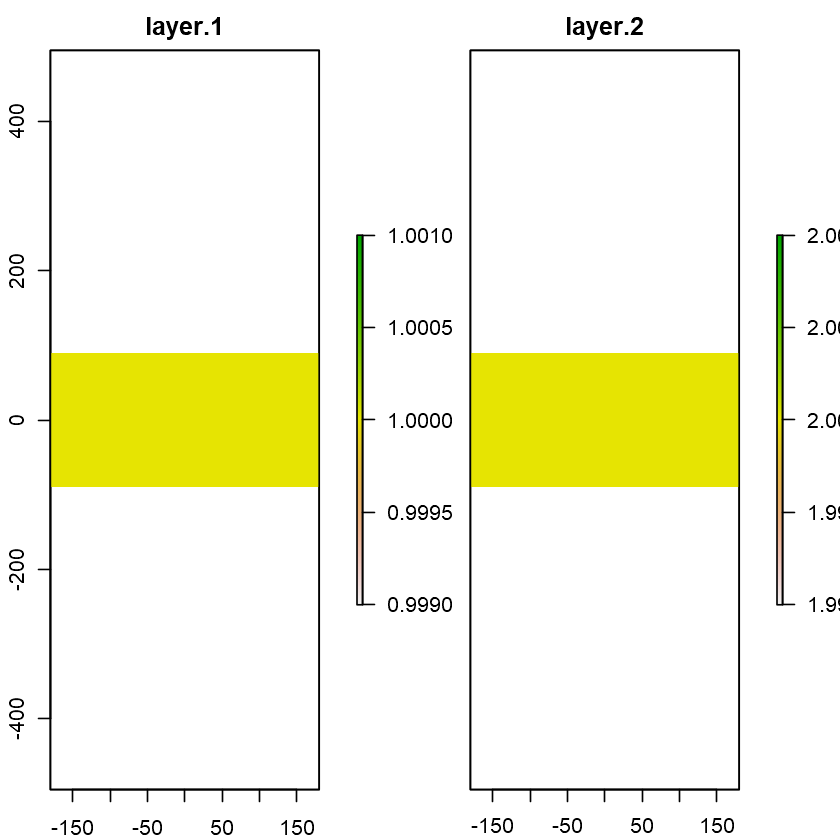

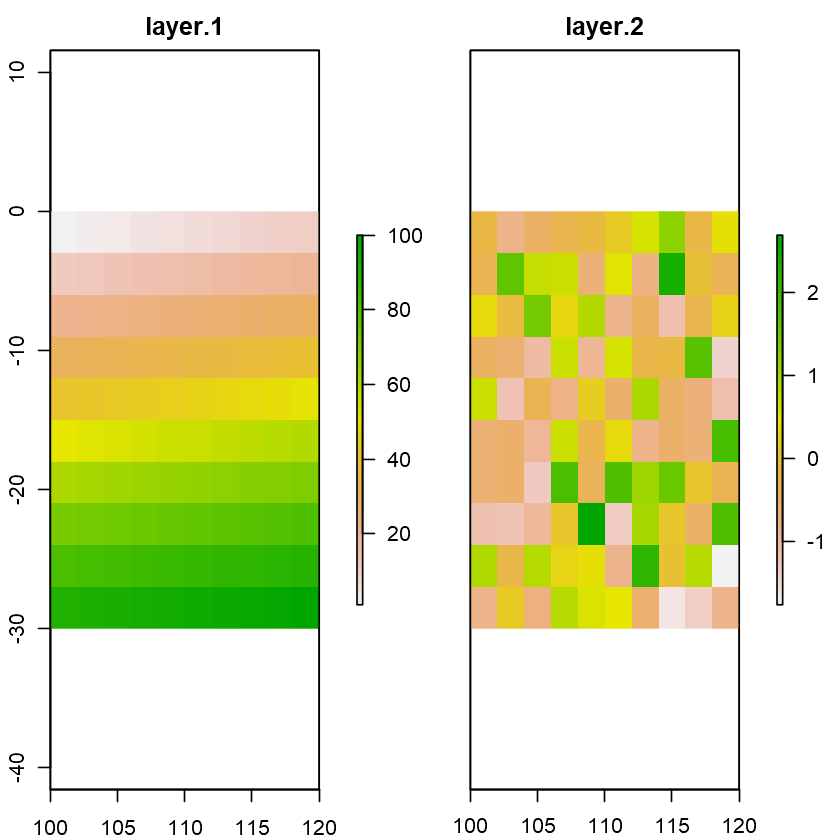

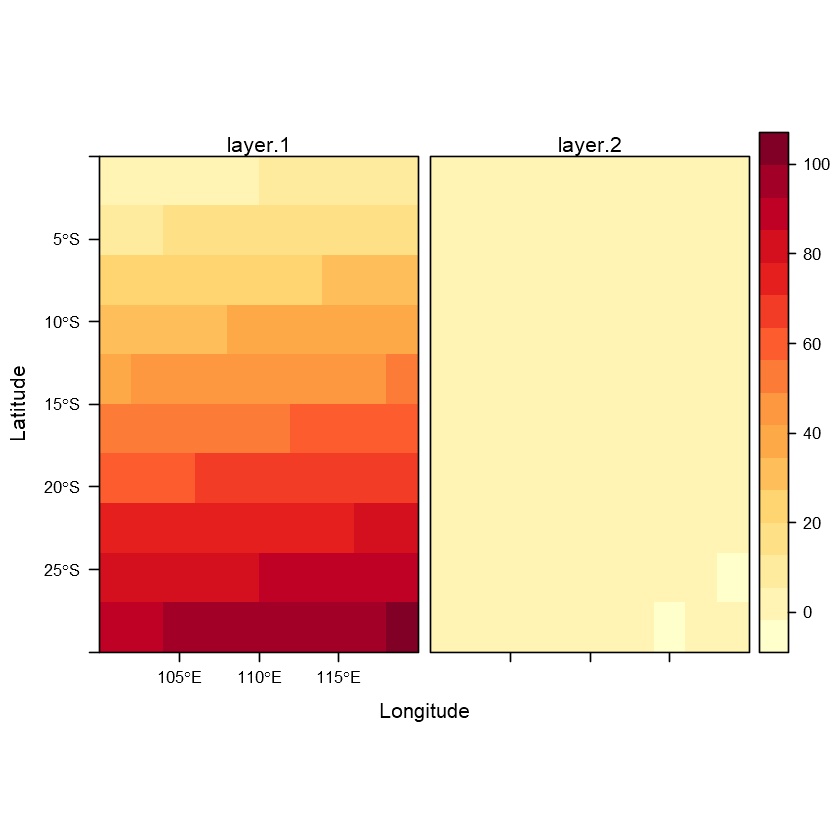

In [19]:

# Basic plot
# par(mfrow=c(2,2))  # 'par': Doesn't work for plotting multi-layer objects. 
plot(s1)
plot(s2)

# Nicer plot (using package raterVis)
levelplot(s2, par.settings=YlOrRdTheme)



# Summarising raster contents

We will explore how to summarise the raster contents both numerically and visually.

   
## Numerical Summaries

We will examine how compute numerical summaries for: 

* The **whole raster layer**. `cellStats`, `freq`, and `crosstab` are part of the `raster` package. `summary` is part of the `base` package, but it includes a method for Raster\* objects. The three functions from the raster packacge can be used for rasters with multiple-layers. However, `summary` can only be used with RasterLayer objects. We can produce:

  * *Summary statistics for a single layer*: The function `cellStats` provides a single summary statistics (e.g. max, mean, min, sd, sum). Some of these summary statistics will fail with very large Raster\* objects. For Raster\* objects the function `summary` returns the: minimum, 1st quartile, median, 3rd quartile, maximum, and the number of cells containing missing data. 
  * *Tables for a single layer*: Frequency and Count table, using the function `freq`
  * *Tables to compare the contents of 2 RasterLayer objects* (i.e. cross-tabulate), using the function `crosstab` 

* **Portions of a raster layer** using zonal statistics, via the function `zonal`. This function can also be used with multiple-layers.

* The **neighbourhood of the cells** using a moving window, via the function 'focal'
`focal` uses a the moving window to calculate the values for the neighbourhood of the focal cell. The moving window shape and values are defined using a matrix of weights with a function. In image processing moving windows (generally a moving average) are used to smooth a data set; that is, to attempt to remove the noise and/or fine-scale structures capturing the main patters in the data.
`focal' currently only works for (single layer) RasterLayer objects. Its output is a new raster.
Peculiarities of this function: 
  1. *Weight Matrix*: Must have an odd number of rows and columns. If an odd number is required acol/row of weight 0 can be added.
  2. *Weight Function*: 
    * Must take multiple numbers and return one (e.g. 'mean', 'modal', 'max', 'min',...)
    * Must accept a 'na.rm' argument (e.g. 'length' will fail)
    * Default weight function is 'sum': It is computationally more efficient to adjust the weights-matrix, than to use some other summary functions through the 'fun' argument (i.e. can compute mean using fractions, see below).
  

[1] 5 5 5 5 5 5 5 3 2 5 3 4 5 3 4 4 5 5 4 3 3 5 4 4 3 4 4 1 3 4 3 5 3 5 3 3 5
 [38] 5 4 4 4 4 3 2 2 4 4 4 5 3 4 4 3 3 5 3 4 5 4 5 2 2 4 3 5 4 4 4 5 4 5 4 4 4
 [75] 4 4 4 3 3 1 3 5 2 4 4 4 5 3 2 5 3 5 4 5 4 2 4 2 3 1 3 2 4 5 5 5 5 4 4 3 3
[112] 4 4 5 5 2 2 3 5 3 4 5 4 5 1 4 5 3 5 4 3 5 5 5 5 4 5 4 3 4 4 3 4 4 4 4 5 4
[149] 2 5

[1]   0.02844617   0.96781331   2.12930076   1.85865804   4.08842604
  [6]   4.03670094   0.16176687   4.79913587   6.18395606   9.65122469
 [11]   9.21357082   9.00510586   3.44316839   0.64342966   6.22969829
 [16]   3.95259610   0.33840514  12.42743802  17.85489941   0.88346942
 [21]   1.91535904  15.63679135   2.56893157   6.10369126  21.77375372
 [26]   2.79937014   5.43286405   5.78559896  15.65657109   9.47287220
 [31]  23.59253742   5.63945699   5.93663558  24.82030891  27.77147733
 [36]  19.78785640  30.54086524   9.62042198  13.59739128  39.50172232
 [41]  12.40627947  36.85979481   4.70303065  42.35942576   2.46456986
 [46]  37.34483676  28.75828195  25.89609597  22.13182067  24.27293392
 [51]  10.73303551  21.41397126  28.91351632  12.04573057  25.98065263
 [56]  33.74517938  24.83228580  46.84737887  34.56424295  50.49867649
 [61]  19.73273476  37.75520271  33.80154118  59.27420141  39.74767129
 [66]  18.03657357  38.12870989  50.52803887  13.62274811  16.72726842
 [71]  30.40361454  17.90087075   2.17334479   1.29112835  57.98178280
 [76]  29.95602923  75.01102887  31.78278480  10.78736423  16.61280451
 [81]  65.91248694  64.20528579  82.70719795  18.56144819  40.52505382
 [86]  78.13877966  37.94457007  46.07661621  75.33647986  57.56355284
 [91]  55.66327713  46.50109421   8.67193578  35.38257414  42.55258847
 [96]   0.20687187  26.06507922  62.97070059  83.59557829  88.08350731
[101]  33.03953913  36.74767393  72.81802635  19.68722428  14.38825472
[106]  88.26478180  11.19109366  89.32259520  79.14550003  72.18609478
[111] 110.02392240   7.00868814  63.67974625  69.44887292 113.31342720
[116] 105.05273104 107.81430784  88.22790496  14.04657127  64.90468944
[121] 117.33770985  66.63055625  26.55874211   0.03468986  38.41623006
[126]  15.90274461 125.97036661  61.11188054  43.76275778 118.38096703
[131]  85.24369361  30.36929984  21.45318629 127.90955529  13.54535756
[136]  19.57487917  69.86502225 129.38644426 129.61012814  65.82729792
[141]  55.29341174 122.84073121  27.49743986  17.80299825  81.80953617
[146]  62.46624428 139.20687352  81.71457184 116.85010853  57.36510283

[1] 3.84

[1] 1

[1] 5

,layer
Min.,1
1st Qu.,3
Median,4
3rd Qu.,5
Max.,5
NA's,0


value,count
1,4
2,13
3,32
4,55
5,46


[1] 55

[1] 10 15  1

value,count
1,4
2,13
3,32
4,55
5,46


value,count
1,4
2,11
3,46
4,46
5,43


value,count
0,0
0,2
0,-14
0,9
0,3


       layer.2
layer.1  1  2  3  4  5
      1  4  0  0  0  0
      2  0 11  2  0  0
      3  0  0 32  0  0
      4  0  0  9 46  0
      5  0  0  3  0 43

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[112] 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[149] 5 5

zone,value
1,6.16810
2,24.25268
3,38.94090
4,57.00016
5,68.99128


zone,mean
1,6.16810
2,24.25268
3,38.94090
4,57.00016
5,68.99128


class       : RasterLayer 
dimensions  : 100, 100, 10000  (nrow, ncol, ncell)
resolution  : 1.8, 1.8  (x, y)
extent      : 0, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 0.1633353, 0.8415039  (min, max)


[1] NA NA NA NA NA NA

class       : RasterLayer 
dimensions  : 100, 100, 10000  (nrow, ncol, ncell)
resolution  : 1.8, 1.8  (x, y)
extent      : 0, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 0.1633353, 0.8415039  (min, max)


[1] NA NA NA NA NA NA

class       : RasterLayer 
dimensions  : 100, 100, 10000  (nrow, ncol, ncell)
resolution  : 1.8, 1.8  (x, y)
extent      : 0, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 0.2400781, 0.7337609  (min, max)


[1] NA NA NA NA NA NA

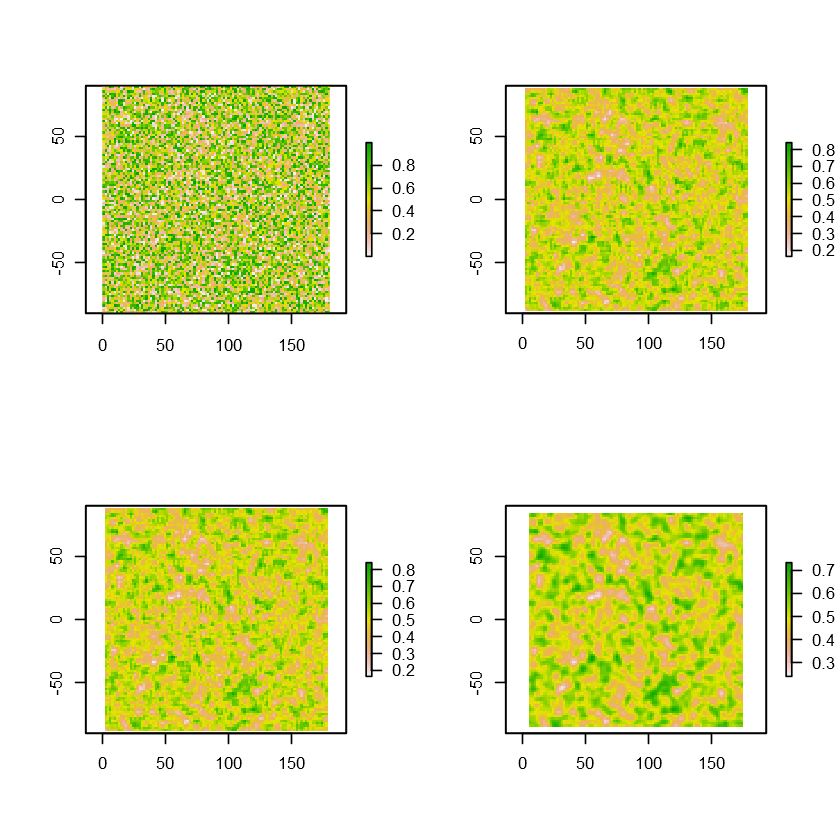

In [20]:

# Create some raster objects

 # Layer containing integers randomly sampled
r3 = raster(nrow=10, ncol=15)
values(r3) = sample(1:5, size=ncell(r3), replace=TRUE, prob=c(0.05,0.05,0.2,0.3,0.4))
values(r3)

 # Layer containing real numbers randomly sampled with an increasing gradient 
 # (gradient increses with cell possition in vector, not matrix)
r4 = raster(nrow=10, ncol=15)
r4[] = runif(ncell(r4)) * 1:ncell(r4)
r4[]


# Summarizing the whole Raster Layer
# ----------------------------------

# mean(r3), min(r3), max(3): Do not work. -> They return a RasterLayer object

# Summary Stats. for the whole layer, one summary statistics at the time: cellStats (from the raster package)
cellStats(r3, mean)
cellStats(r3, min)
cellStats(r3, max)

# Summary Stats. for the whole layer, several summary statistics at the time: summary (from the base package)
summary(r3)

# Frequency and Count Tables
freq(r3)
freq(r3, value=4)

# Cross-tabulate (i.e. compare) the contents of 2 RasterLayer objects
dim(r3)
r5 = r3
r5[5,] = rep(3,ncol(r5))
#values(r3); values(r5)
freq(r3); freq(r5); freq(r3)-freq(r5)
crosstab(r3,r5)  #crosstab(r3,r5, useNA=FALSE) - No difference!?


# Summarizing a Portion of a Raster Layer
# --------------------------------------

# Definine and Summarise particular areas: Zonal statistics
r4.zones = r4
r4.zones[] = rep(1:5, each=30)
r4.zones[]
zonal(r4, r4.zones, mean) # Using a function: For small files
zonal(r4, r4.zones, 'mean') # Using a 'character value': For big files is better this way

# Summarizing values in the Cell Neighbourhood using a "moving window" (focal function)
# -------------------------------------------------------------------------------------
r5 = raster(ncols=100,nrows=100, xmn=0)
r5[] = runif(ncell(r5))

# 3x3 mean filter
r5.fw3x3 = focal(r5, w=matrix(1/9,nrow=3,ncol=3)) 
r5.fw3x3
head(values(r5.fw3x3))

# 5x5 mean filter
r5.fw5x5 = focal(r5, w=matrix(1/9,nrow=3,ncol=3)) 
r5.fw5x5
head(values(r5.fw5x5))

# Gaussian filter
wGaus = focalWeight(r5, 2, "Gauss")
r5.fwGaus = focal(r5, w=wGaus)
r5.fwGaus
head(values(r5.fwGaus))

# Compare rasters visually
# Dimensions & Resolution mantained (!= to 'aggregate', see later)
# With mean (i.e. weighted sum really) filter values are in the same range than in the original 
# raster; but in with the Gaussian filter values can be smaller and larger than in the original layer.
par(mfrow=c(2,2))
plot(r5)
plot(r5.fw3x3)
plot(r5.fw5x5)
plot(r5.fwGaus)



## Visual Summaries

The `raster` package provides many functions to visualy display and summarise the data in `Raster*` objects. The `rasterVis` package complements the `raster` package, providing additional methods for enhanced visualization and interaction. 

Some of the functions in this packages can only be used in single-layer rasters, others can only be used in muti-layered rasters, and the remaining functions can be used for both single-layer and multi-layer rasters. In particular, the visualisation functions that we explore below can be applied the the following raster data types: 

* Single-layer raster objects:
  * In `raster` packge: `contour`
* Single-layer & multi-layer raster objects:
  * In `raster` packge: `histogram`, `densityplot`, `persp`
  * In `rasterVis` packge: `contourplot`
* Multi-layer raster objects:
  * In `raster` packge: `pairs`, `plotRGB`
  * In `rasterVis` packge: `bwplot`
  

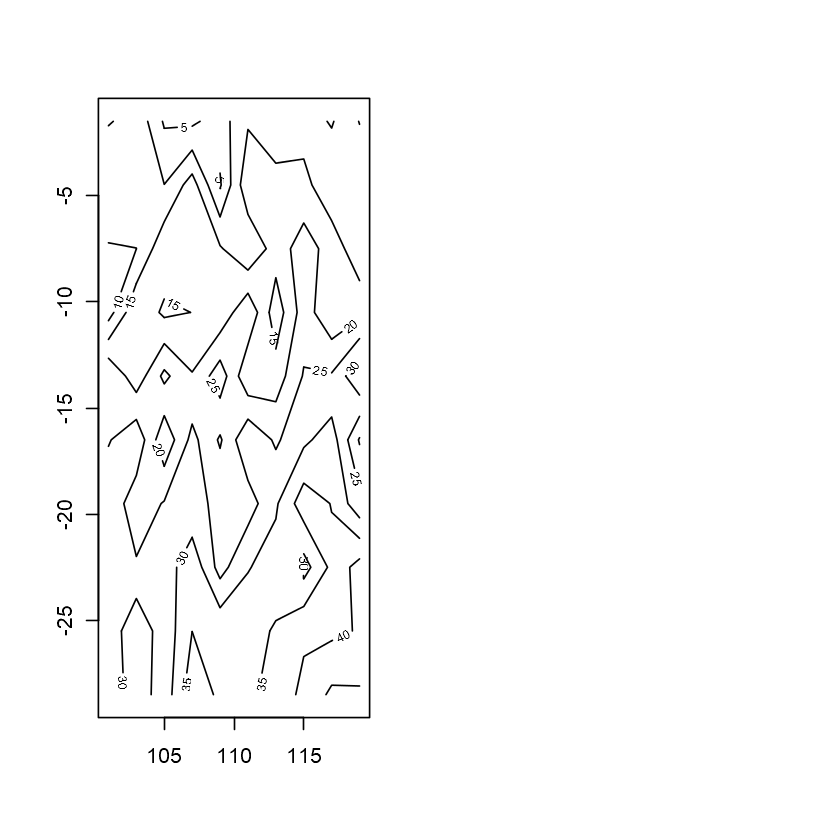

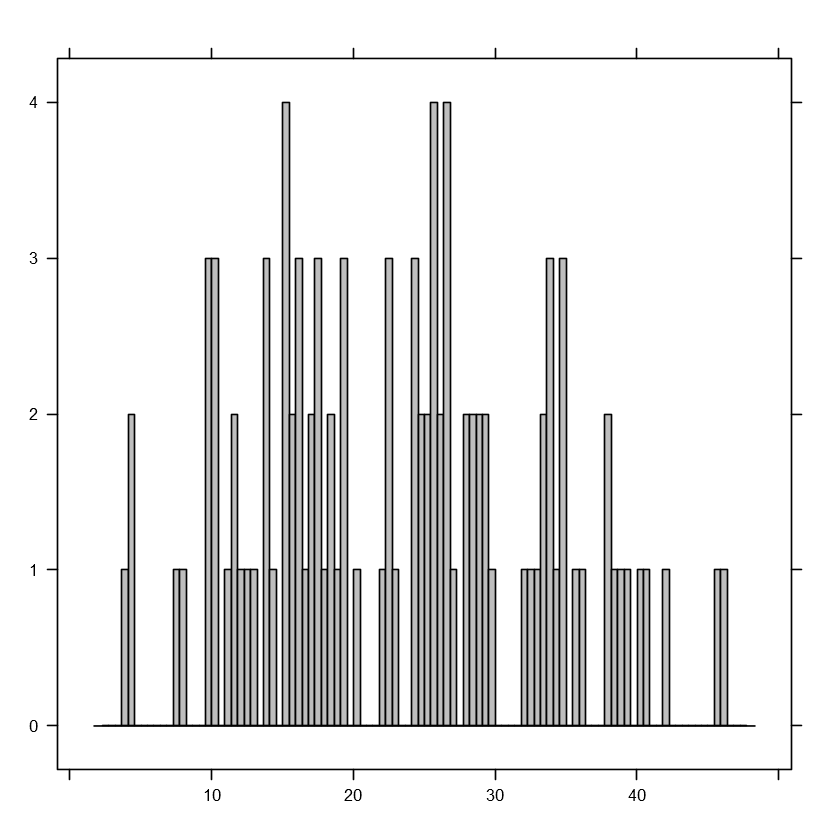

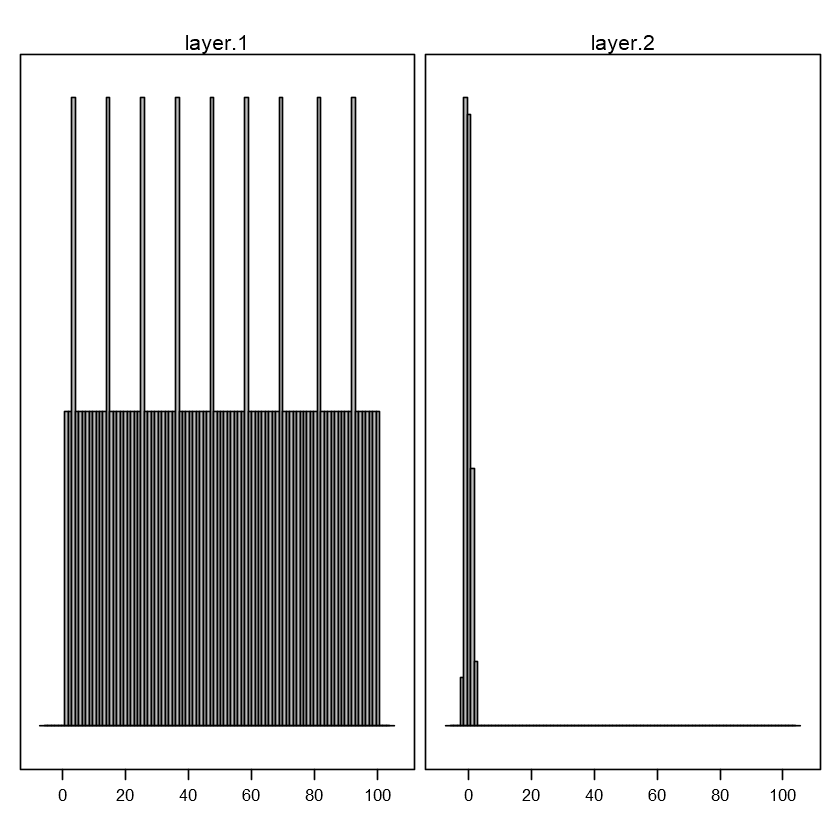

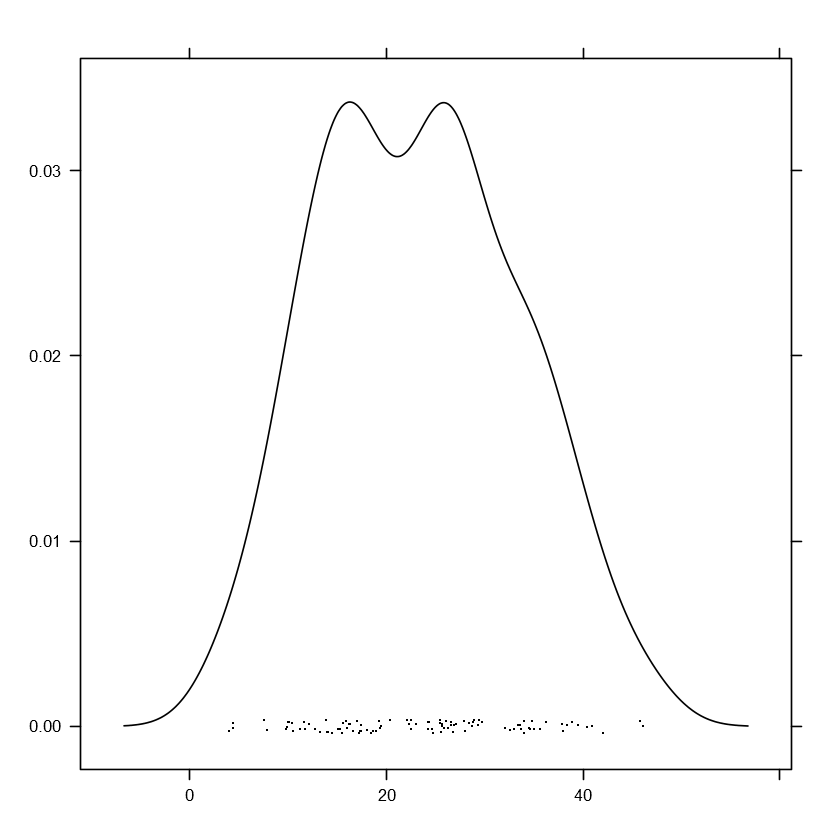

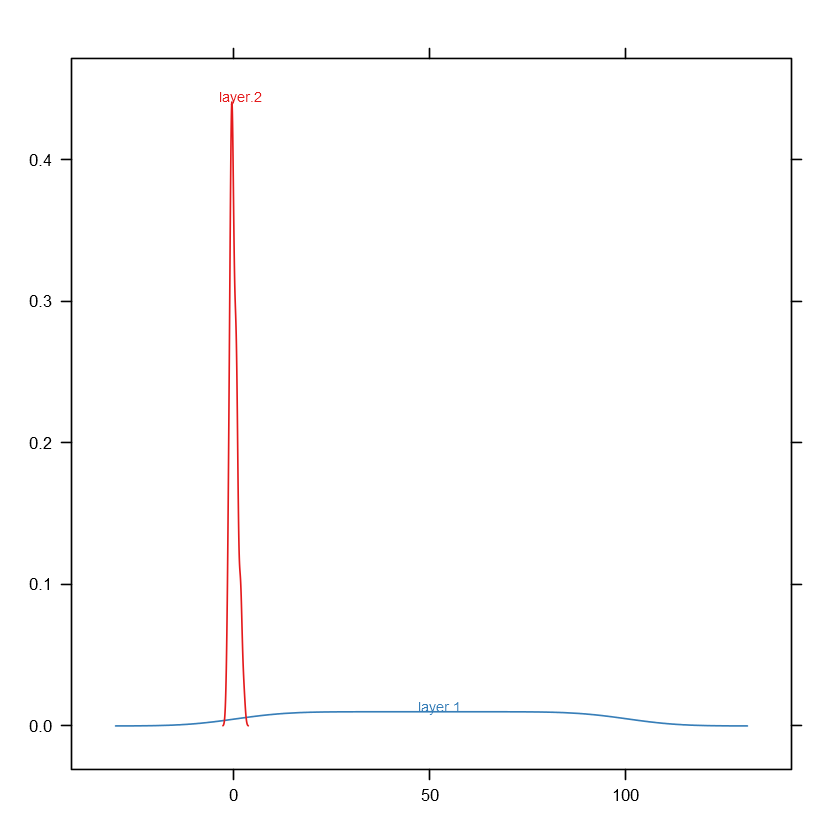

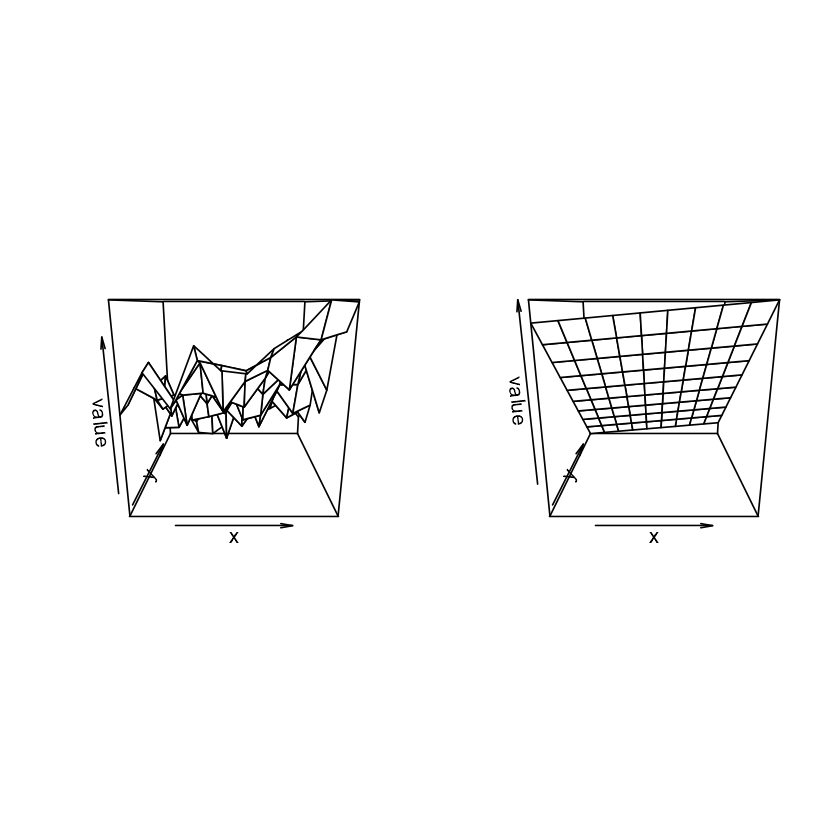

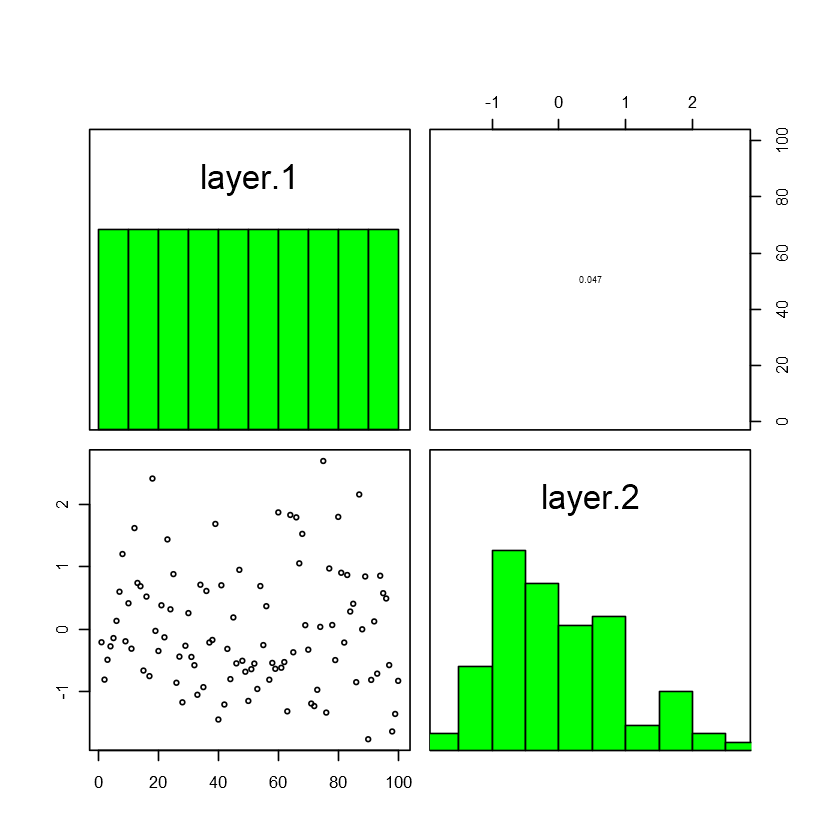

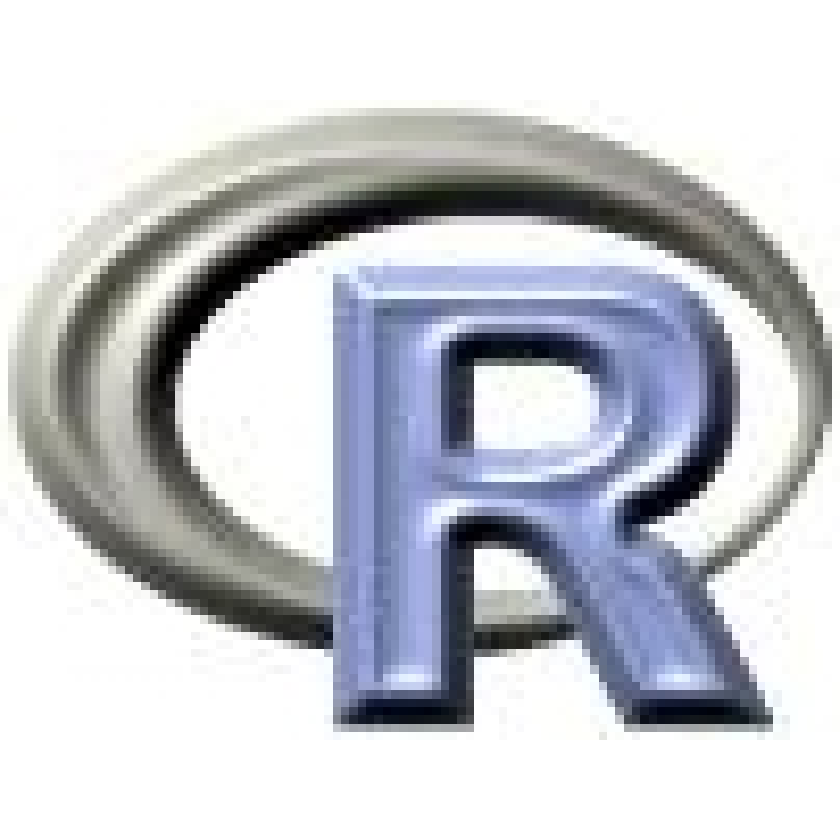

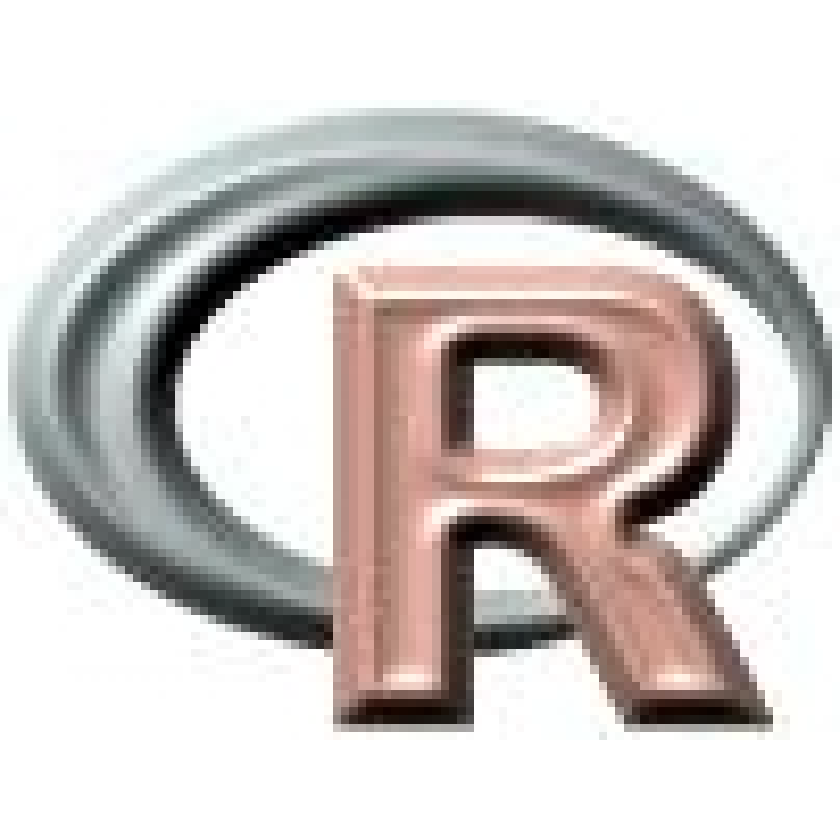

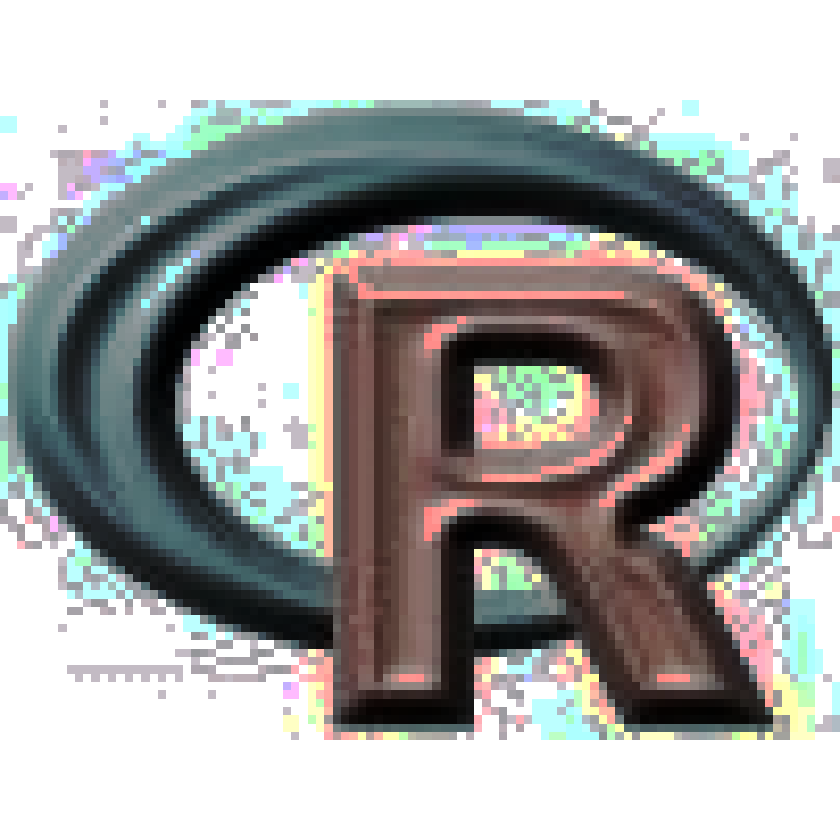

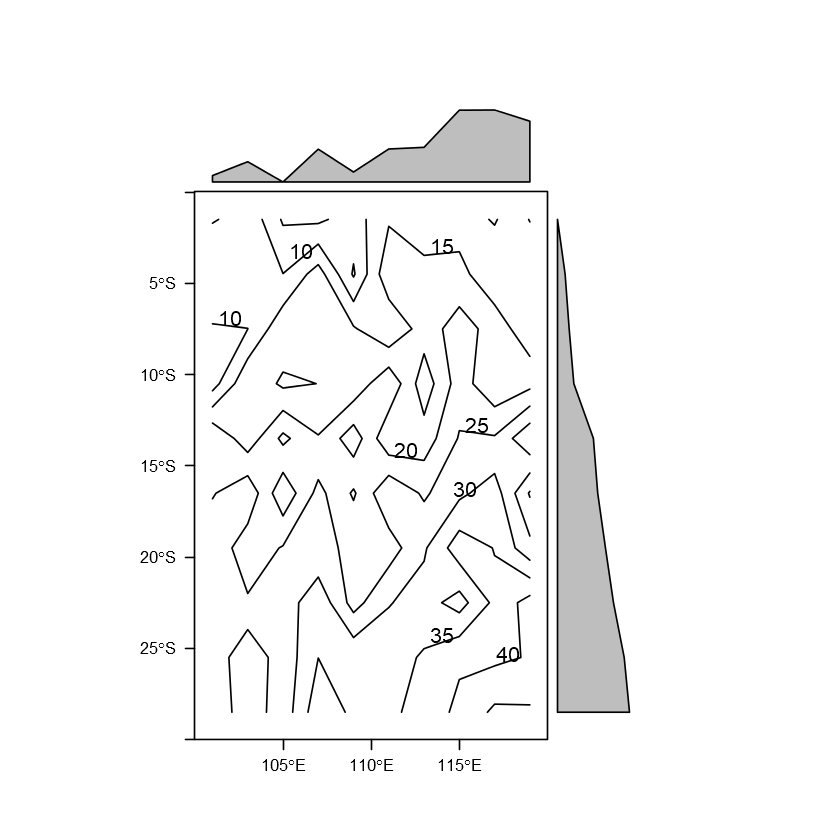

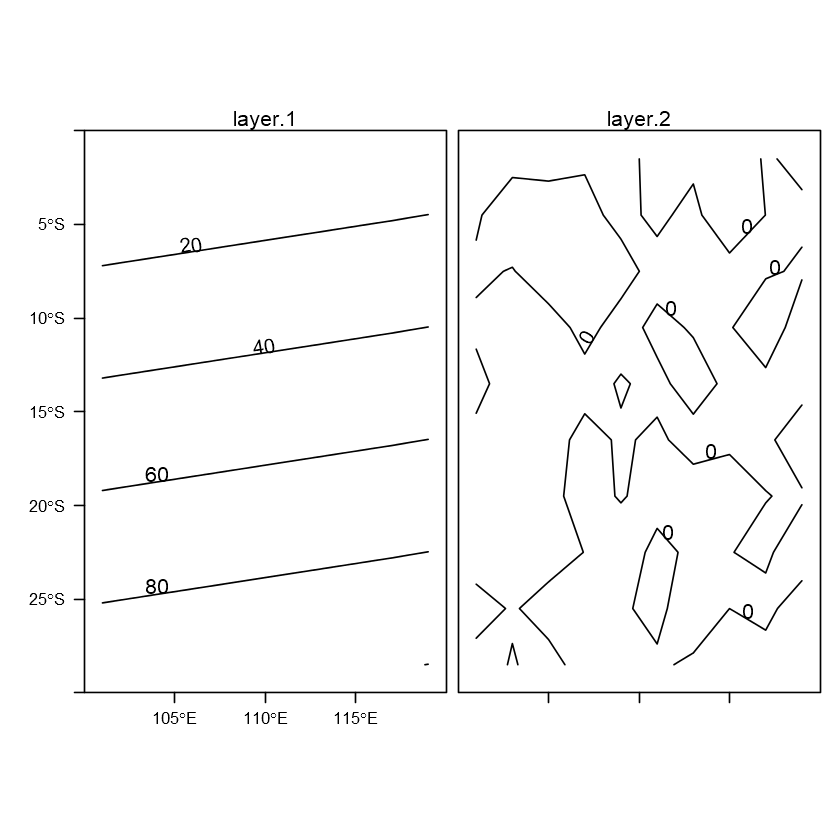

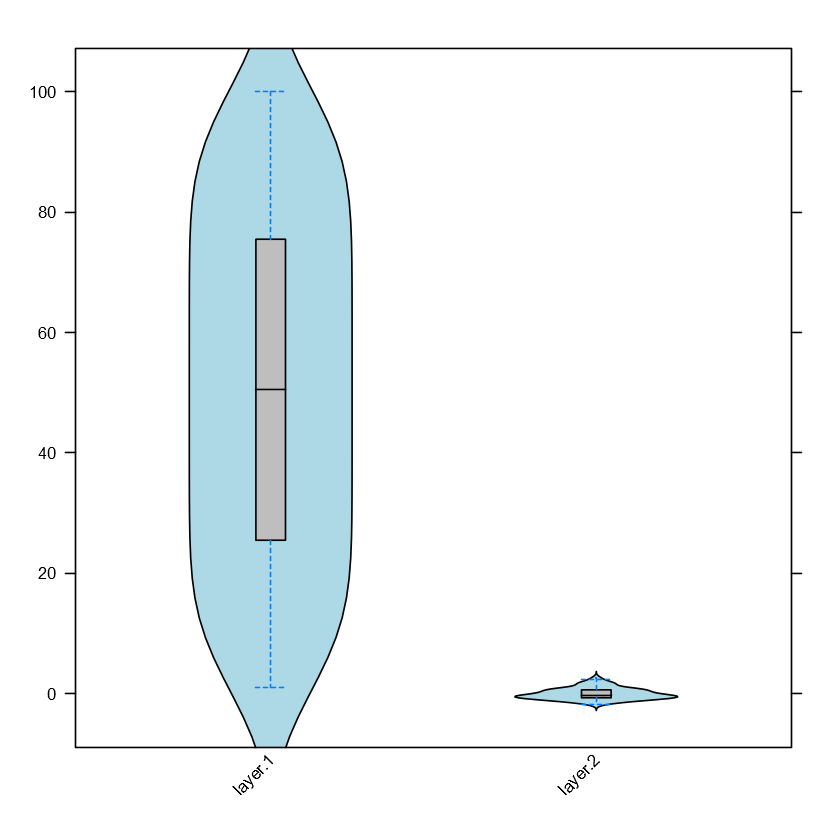

In [21]:

# In package 'raster'
# ==================
# In addition of 'plot()' to draw the values of a raster (see above)


# For a Single Layer objects exclusively
# --------------------------------------
# Contour: Contour plot of a Raster Layer
par(mfrow=c(1,2))
contour(r2b)
#contour(s2)   # WRONG: It doesn't work! ('contourplot()' in 'rasterVis' pkg works for all Raster* objects)


# For both a Single Layer and Multiple Layers objects
# ---------------------------------------------------

# Histogram: Draw histograms (with lattice) of Raster objects.
par(mfrow=c(1,2))
histogram(r2b)
histogram(s2)

# Density plots: Draw kernel density plots (with lattice) of Raster objects.
# par(mfrow=c(1,2)) # 'par()': Doesn't work with 'densityplot()'
densityplot(r2b)
densityplot(s2)

# Perspective plot. This is an implementation of a generic function in the graphics package.
par(mfrow=c(1,2))
persp(r2b)
persp(s2)


# For a Multiple Layers (RasterStack and RasterBrick objects) objects exclusively
# -------------------------------------------------------------------------------
# Pairs: Pair plots of layers in a RasterStack or RasterBrick. 
# This is a wrapper around graphics function pairs.
par(mfrow=c(1,1))
pairs(s2)

# plotRGB: Make a Red-Green-Blue plot based on 3 layers. (Description and Example from 'plotRGB()' Help).
# These 3 layers are sometimes referred to as "bands" because they may represent different bandwidths in the 
# electromagnetic spectrum.
# The 3 layers are combined such that they represent the red, green and blue channel. 
# This function can be used to make 'true (or false) color images' from Landsat and other multi-band satellite images. 
b = brick(system.file("external/rlogo.grd", package="raster"))
plotRGB(b)
plotRGB(b, 3, 2, 1)
plotRGB(b, 3, 2, 1, stretch='hist')
rm(b)

 

# In package 'rasterVis'
# ======================
# In addition of 'levelplot()' to draw the values of a raster (see above)



# For both a Single Layer and Multiple Layers objects
# ---------------------------------------------------
# Contour Plots of Raster objects with lattice methods and marginal plots with grid objects.  
contourplot(r2b)
contourplot(s2)


# For Multiple Layers (RasterStack and RasterBrick objects) object exclusively
# ----------------------------------------------------------------------------
# Bwplots: Plots of RasterStackBrick objects using to compose the graphic a combination of:
#  panel.violin and panel.bwplot.
bwplot(s2)



#  Working with rasters values


## Modifying individual cell values


In [22]:

# Directly (already used above to assing values to raster r2b)
r1c = r1b
r1c[5,1:5] = 6:10  # (In row 5, columns 1 to 5 = 6 to 10)
values(r1c)
r1c[5,6]=NA   # Missing data
values(r1c)
r1c[5,6]=-9999    # '-9999' is the Missing Data Flag in many GIS standards (e.g. NEON)
values(r1c)

# Combined with replacement functions
values(r1c)   # Missing data flag: -9999
r1c[r1c==-9999] = NA  # Missing data flag changed back to: NA
values(r1c)

r1c = (r1c==2)
values(r1c)
r1c[!r1c] = 0
r1c[r1c] = 1
values(r1c)


[1]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 [26]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 [51]  2  2  2  2  2  2  2  2  2  2  6  7  8  9 10  2  2  2  2  2  2  2  2  2  2
 [76]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
[101]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
[126]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2

[1]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 [26]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 [51]  2  2  2  2  2  2  2  2  2  2  6  7  8  9 10 NA  2  2  2  2  2  2  2  2  2
 [76]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
[101]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
[126]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2

[1]     2     2     2     2     2     2     2     2     2     2     2     2
 [13]     2     2     2     2     2     2     2     2     2     2     2     2
 [25]     2     2     2     2     2     2     2     2     2     2     2     2
 [37]     2     2     2     2     2     2     2     2     2     2     2     2
 [49]     2     2     2     2     2     2     2     2     2     2     2     2
 [61]     6     7     8     9    10 -9999     2     2     2     2     2     2
 [73]     2     2     2     2     2     2     2     2     2     2     2     2
 [85]     2     2     2     2     2     2     2     2     2     2     2     2
 [97]     2     2     2     2     2     2     2     2     2     2     2     2
[109]     2     2     2     2     2     2     2     2     2     2     2     2
[121]     2     2     2     2     2     2     2     2     2     2     2     2
[133]     2     2     2     2     2     2     2     2     2     2     2     2
[145]     2     2     2     2     2     2

[1]     2     2     2     2     2     2     2     2     2     2     2     2
 [13]     2     2     2     2     2     2     2     2     2     2     2     2
 [25]     2     2     2     2     2     2     2     2     2     2     2     2
 [37]     2     2     2     2     2     2     2     2     2     2     2     2
 [49]     2     2     2     2     2     2     2     2     2     2     2     2
 [61]     6     7     8     9    10 -9999     2     2     2     2     2     2
 [73]     2     2     2     2     2     2     2     2     2     2     2     2
 [85]     2     2     2     2     2     2     2     2     2     2     2     2
 [97]     2     2     2     2     2     2     2     2     2     2     2     2
[109]     2     2     2     2     2     2     2     2     2     2     2     2
[121]     2     2     2     2     2     2     2     2     2     2     2     2
[133]     2     2     2     2     2     2     2     2     2     2     2     2
[145]     2     2     2     2     2     2

[1]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 [26]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 [51]  2  2  2  2  2  2  2  2  2  2  6  7  8  9 10 NA  2  2  2  2  2  2  2  2  2
 [76]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
[101]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
[126]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61] FALSE FALSE FALSE FALSE FALSE    NA  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

[1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [26]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [51]  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0 NA  1  1  1  1  1  1  1  1  1
 [76]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[101]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[126]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1


## Raster Calculations

### 'Raster Algebra' (also known as 'Raster Maths')

Used for small rasters and simple calculations

Directly  combines rasters using:

* Operators (for more information on R Operators see this [link](https://www.datamentor.io/r-programming/operator/)):  
  * Arithmetic operators (+,'-,*,/,^,%%,%/%)
  * Relational operators (>, <, >=, <=, ==, !=)
  * Logical operators (!,&,&&,|,||)  
* Functions (algebraic (but 'abs'), summary, and logical functions need > 1 layer): 
  * Algebraic functions (e.g. abs, sum, prod)
  * Rounding functions (round, ceiling, floor, trunc)
  * Re-scaling functions (e.g. log, log10, sqrt, exp)
  * Trigonometric functions (e.g. sin, cos, tan, atan)
  * Summary functions (e.g. min, max, range)
  * Logical functions(any, all)  


In [24]:

# Using 1 layer
# --------------
values(r1a)
values((r1a * 3)^2)
values(r1a == 1)
values(!(r1a == 1))
values(sqrt(r1b))
values(round(sqrt(r1b)))
values(round(sqrt(r1b))==1)


# Using multiple layers
# -----------------------

# With Operatros
values(r1a)
values(r1b)
r1c=r1a + r1b
values(r1c)

# With Functions
  # Algebraic functions
values(sum(r1a,r1b))
values(prod(r1a,r1b))
  # Summary functions
values(max(r1a,r1b))
values(min(r1a,r1b))
values(mean(r1a,r1b))
  # Logical Functions
values(r1c)
r1c = (r1c == 1)
values(r1c)
values(any(r1c, !r1c))
values(all(r1c, !r1c))


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

[1] 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 [38] 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 [75] 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
[112] 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
[149] 9 9

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[121] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[136] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE

[1] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
  [9] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
 [17] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
 [25] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
 [33] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
 [41] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
 [49] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
 [57] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
 [65] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
 [73] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
 [81] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
 [89] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
 [97] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
[105] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
[113] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
[121] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
[129] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
[137] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214
[145] 1.414214 1.414214 1.414214 1.414214 1.414214 1.414214

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[121] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[136] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

[1] 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 [19] 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 [37] 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 [55] 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 [73] 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 [91] 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
[109] 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
[127] 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
[145] 1.5 1.5 1.5 1.5 1.5 1.5

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[121] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[136] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE


### Raster Calculations using Higher Level Functions

Directly adding, subtracting, etc. layers of big raster objects is not recommended.

For big raster objects High Level Functions should be used instead.



#### For a Single  Raster Objects

`calc`: Uses a single Raster\* object and a provided formula to calculate values for a new Raster\* object. 

The function type will depend of the input object type:
* For a uni-layer (RasterLayer) input, the function  is typically a function that can take a single vector as input and return a vector of values of the same length (e.g. sqrt). 
* For a multi-layer (RasterStack or RasterBrick) input, the function should operate on a vector of values, with one vector for each cell.

The object type returned depends on the input object type and function type:
* When input is a RasterLayer, it returns a RasterLayer.
* When input is a RasterStack or RasterBrick and the Function a Summary type Function (i.e. returns a single value), it returns a RasterLayer.
* When input is a RasterStack or RasterBrick and the Function returns more than one number (e.g. fun=quantile), it returns a RasterBrick.

In many cases, what can be achieved with 'calc', can also be accomplished with a more intuitive 'raster-algebra' notation. For example, the log10 of the cells in a raster can be computed as log10(r), which is simpler than using calc with this function. However, `calc` should be faster when using large datasets and/or complex formulas. 

The function can even be a statistical function, such as `lm`. See `cacl` help for details.


In [25]:

# To calculate the log10 of the values in a raster can do:
 # Method 1: Directly providing the function
r1b.log10.m1 = calc(r1b, fun=log10)
r1b.log10.m1 
 # Method 2: Writing a function and passing it on.
r1b.log10.m2 = function(r) { log10(r) }
r1b.log10.m2 = calc(r1b, fun=r1b.log10.m2)
r1b.log10.m2

# Replace values too high (>100) and too low (< 0) with NAs
r5 = raster(ncols=10, nrows=10)
r5[] = runif(ncell(r5), min=-10, max=110)
summary(r5)
replacement.f1 = function(r) { r[r<0|r>100] = NA; return(r) }
r5.NAs = calc(r5, fun=replacement.f1)
summary(r5.NAs)

# Replace 'NA' with '-9999', the code for missing values in some package
 replacement.f2 = function(r) { r[is.na(r)] = -9999; return(r) }
 r5.neg9999 = calc(r5.NAs, fun=replacement.f2)
 summary(r5.neg9999)


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 0.30103, 0.30103  (min, max)


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 0.30103, 0.30103  (min, max)


,layer
Min.,-7.134837
1st Qu.,9.992851
Median,53.012390
3rd Qu.,79.012762
Max.,109.275558
NA's,0.000000


,layer
Min.,0.05186696
1st Qu.,14.06100815
Median,53.65643608
3rd Qu.,71.54993558
Max.,98.59623969
NA's,11.00000000


,layer
Min.,-9999.000000
1st Qu.,7.530289
Median,45.966747
3rd Qu.,69.527376
Max.,98.596240
NA's,0.000000




`stackApply`: Computes summary type layers for subsets of a RasterStack or RasterBrick.
To do so it uses a summary function applied on subsets of layers of a RasterStack or RasterBrick object.These subsets are defined by vector indices. If the number of indeces in the vector is smaller than the number of layers the indices are recycled.
The summary function must return a single value; thus, the number of layers in the output Raster\* equals then number of unique values in the indices vector. 
If the output raster contains a single layer it would be a RasterLayer object. If it contains multiple layers it would be a RasterBrick object.


In [26]:

# it would be a RasterBrick object.
s = stack(r1a,r1a,r1a,r1b,r1b,r1b)

s.sA1 = stackApply(s, indices=rep(1,nlayers(s)), fun=mean)
s.sA1

# Providing indices for all layers. Output is a RasterBrick with 2 layers: Mean of layers 1-3 and mean of layers 4-6.
s.sA2 = stackApply(s, indices=c(1,1,1,2,2,2), fun=mean)
s.sA2

# Recycled indices. Output is a RasterBrick with 2 layers: Mean of layers 1, 3,and 5 and mean of layers 2, 4, and 6.
s.sA3 = stackApply(s, indices=c(1,2), fun=mean)
s.sA3

rm(s)


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : index_1 
values      : 1.5, 1.5  (min, max)


class       : RasterBrick 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : index_1, index_2 
min values  :       1,       2 
max values  :       1,       2 


class       : RasterBrick 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       :  index_1,  index_2 
min values  : 1.333333, 1.666667 
max values  : 1.333333, 1.666667 



`overlay`: It is typically used with multiple Raster\* objects, but it can also be used with a single `Raster*` object. However, it is often simpler to use `calc` (or "Raster Algebra") for single Raster\* objects. See next section for its application to multi-layered raster objects.



#### For a Multiple  Raster Objects

`ovelay`: It is more efficient that 'Raster Maths' when rasters are large and/or calculations complex and/or rasters stored in separate individual files.

NOTE: Do not confuse with the deprecated 'overlay' function in the 'sp' package. They are different.

Syntax:  output.ras = overlay(input1.ras, input2.ras, fun=FunctionCalcName)

The raster objects used as inputs can be single-layered or multi-layered rasters (with the same number of layers). Both case produce similar results. In the multi-layered rasters case the function is applied to each pair of layers.


In [27]:

# Input single-layered objects (RasterLayer)
# ..........................................
values(r1a)
values(r1b)

# Adding Rasters
 # Using Raster Algebra with Operators
r1c=r1a + r1b
values(r1c)
 # Using 'overlay()'
r1d = overlay( r1a, r1b, fun=function(r1,r2) {return(r1+r2)} )
values(r1d)
values(r1c==r1d)  # Compare individual cells, are they equal?
all(values(r1c==r1d))  # Are all cells equal (in 1 answer)?

# Using a function
silly.f = function(x,y) {
				silly.ras = x* round((y)^(2/3))
				return(silly.ras) 
				}
r1e = overlay(r1a, r1b, fun=silly.f)
values(r1e)


# Input multi-layered objects (RasterStack/RasterBrick)
# .....................................................
s1a = stack(r1a,r1a)
s1b = stack(r1b,r1b)
s1ab = stack(r1a,r1b)
s1a; s1b

# Adding rasters
s1d1 = overlay( s1a, s1b, fun=function(r1,r2) {return(r1+r2)} )
s1d2 = overlay( s1ab, s1ab, fun=function(r1,r2) {return(r1+r2)} )
r1d; s1d1; s1d2

# Using a function
s1e1 = overlay(s1a, s1b, fun=silly.f)
s1e2 = overlay(s1ab, s1ab, fun=silly.f)
r1e; s1e1; s1e2

rm(r1d, r1e, s1d1, s1d2, s1e1, s1e2)


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[121] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[136] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

class       : RasterStack 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
names       : layer.1, layer.2 
min values  :       1,       1 
max values  :       1,       1 


class       : RasterStack 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
names       : layer.1, layer.2 
min values  :       2,       2 
max values  :       2,       2 


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 3, 3  (min, max)


class       : RasterBrick 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1, layer.2 
min values  :       3,       3 
max values  :       3,       3 


class       : RasterBrick 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1, layer.2 
min values  :       2,       4 
max values  :       2,       4 


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 2, 2  (min, max)


class       : RasterBrick 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1, layer.2 
min values  :       2,       2 
max values  :       2,       2 


class       : RasterBrick 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1, layer.2 
min values  :       1,       4 
max values  :       1,       4 



NOTE: Rasters in operations including multiple rasters must have the same: Dimensions, Projection, Extent, and Resolution.
E.g.: Create a new raster with the same Dimensions and Projection than r1a and r1b, but different Extent and Resolution


In [28]:

r3 = raster(nrow=10, ncol=15, xmn=100, xmx=130, ymn=-30, ymx=0)
values(r3) = 5;
r1a; r1b; r3
values(r1a+r1b)   # Works
#values(r1a+r3)     # Does Not Work
rm(r3)


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 1  (min, max)


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 2, 2  (min, max)


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 130, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 5, 5  (min, max)


[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3


## Raster Classification

Aim: To reclassify values in the raster; for example from 6 different land-types, ecosystems to 3


[1] 6 4 5 4 2 4 1 4 6 5 6 2 5 4 2 1 3 3 6 3 4 4 2 2 3 2 3 6 5 2 2 6 4 4 6 3 1
 [38] 4 2 5 1 1 1 3 6 4 1 1 1 5 4 2 4 2 1 3 5 4 3 6 2 1 2 3 6 1 3 1 1 4 6 4 6 2
 [75] 3 4 5 1 1 4 6 3 4 6 3 1 4 2 2 1 4 2 1 4 1 1 1 5 1 5

[1] 1 2 3 4 5 6

1,1
2,2
3,2
4,2
5,3
6,3


[1] 6 4 5 4 2 4 1 4 6 5 6 2 5 4 2 1 3 3 6 3 4 4 2 2 3 2 3 6 5 2 2 6 4 4 6 3 1
 [38] 4 2 5 1 1 1 3 6 4 1 1 1 5 4 2 4 2 1 3 5 4 3 6 2 1 2 3 6 1 3 1 1 4 6 4 6 2
 [75] 3 4 5 1 1 4 6 3 4 6 3 1 4 2 2 1 4 2 1 4 1 1 1 5 1 5

[1] 3 2 3 2 2 2 1 2 3 3 3 2 3 2 2 1 2 2 3 2 2 2 2 2 2 2 2 3 3 2 2 3 2 2 3 2 1
 [38] 2 2 3 1 1 1 2 3 2 1 1 1 3 2 2 2 2 1 2 3 2 2 3 2 1 2 2 3 1 2 1 1 2 3 2 3 2
 [75] 2 2 3 1 1 2 3 2 2 3 2 1 2 2 2 1 2 2 1 2 1 1 1 3 1 3

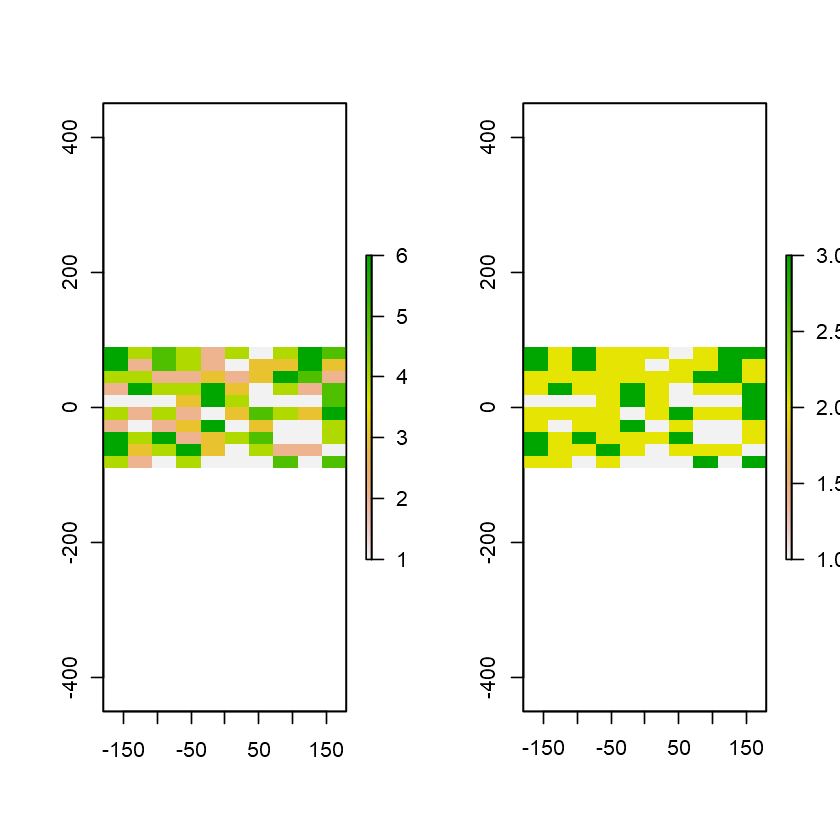

In [29]:

r3 = raster(nrow=10, ncol=10)
values(r3) = sample(x=1:6, size=ncell(r3), replace=TRUE)
values(r3)

old.vals = sort(unique(values(r3)))
old.vals

reclass.m = matrix(c(old.vals, c(1,rep(2,3),3,3)), ncol=2)
reclass.m


r3.reclass = reclassify(r3, rcl=reclass.m)
values(r3)
values(r3.reclass)
par(mfrow=c(1,2))
plot(r3)
plot(r3.reclass)



# Other ways to Combine multiple Raster objects: 'mask()' and 'cover()'


## 'mask()'

`mask()`: It creates a new Raster\* object that has the same values as x, except for the cells that are NA (or other maskvalue) in a 'mask'. These cells become NA (or other updatevalue). The mask can be:  A Raster\* object of the same extent and resolution, or a Spatial\* object (e.g. SpatialPolygons) in which case all cells that are not covered by the Spatial object are set to updatevalue. You can use `inverse=TRUE` to set the cells that are not NA (or other maskvalue) in the mask, or not covered by the Spatial* object, to NA (or other updatevalue). 


In [30]:

# Exlore Original Raster
r2b; r2b[]

# Create a Raster Mask
r2b.Mask = r2b
r2b.Mask[] = 1
r2b.Mask[5:6,] = NA
r2b.Mask[,c(1,9)] = NA
r2b.Mask; r2b.Mask[]

# r2b masked out
r2b.MaskedOut = mask(r2b, r2b.Mask)
r2b.MaskedOut; r2b.MaskedOut[]


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 3.982552, 46.06081  (min, max)


[1] 15.246057 13.835878  4.378621  3.982552  7.552386 14.421652 10.467678
  [8] 12.718751 15.447149  9.808733 11.697501 13.190300 10.060452 17.322481
 [15]  4.410175 18.967678 17.363584 16.578576 11.228219 13.908983  9.824900
 [22]  9.964634 18.635407 15.451579 15.554844 10.357431 17.440563 22.323201
 [29] 17.967676 11.558433  7.798949 19.202665 14.020813 15.063038 16.315317
 [36] 24.169308 12.073855 22.482555 16.003644 18.423817 24.762513 16.976962
 [43] 26.225652 20.340547 27.932023 15.882135 17.167371 25.418906 25.491358
 [50] 34.446906 24.584532 28.770872 16.183922 26.537668 19.325882 29.398141
 [57] 24.216056 28.917673 32.526370 19.478269 28.650276 22.027540 25.379965
 [64] 25.843143 24.350490 22.497837 29.326101 37.866976 34.800105 26.542249
 [71] 28.326795 25.602696 27.048742 33.677485 23.015148 29.715735 32.088301
 [78] 27.885719 36.242070 42.037256 26.017336 34.579905 26.707533 34.967134
 [85] 33.988506 32.962830 35.561309 39.427861 38.899311 40.380573 25.593526
 [92] 33.581370 26.835998 38.384453 33.952836 33.371777 37.891973 40.849015
 [99] 46.060811 45.724338

class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 1  (min, max)


[1] NA  1  1  1  1  1  1  1 NA  1 NA  1  1  1  1  1  1  1 NA  1 NA  1  1  1  1
 [26]  1  1  1 NA  1 NA  1  1  1  1  1  1  1 NA  1 NA NA NA NA NA NA NA NA NA NA
 [51] NA NA NA NA NA NA NA NA NA NA NA  1  1  1  1  1  1  1 NA  1 NA  1  1  1  1
 [76]  1  1  1 NA  1 NA  1  1  1  1  1  1  1 NA  1 NA  1  1  1  1  1  1  1 NA  1

class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 3.982552, 45.72434  (min, max)


[1]        NA 13.835878  4.378621  3.982552  7.552386 14.421652 10.467678
  [8] 12.718751        NA  9.808733        NA 13.190300 10.060452 17.322481
 [15]  4.410175 18.967678 17.363584 16.578576        NA 13.908983        NA
 [22]  9.964634 18.635407 15.451579 15.554844 10.357431 17.440563 22.323201
 [29]        NA 11.558433        NA 19.202665 14.020813 15.063038 16.315317
 [36] 24.169308 12.073855 22.482555        NA 18.423817        NA        NA
 [43]        NA        NA        NA        NA        NA        NA        NA
 [50]        NA        NA        NA        NA        NA        NA        NA
 [57]        NA        NA        NA        NA        NA 22.027540 25.379965
 [64] 25.843143 24.350490 22.497837 29.326101 37.866976        NA 26.542249
 [71]        NA 25.602696 27.048742 33.677485 23.015148 29.715735 32.088301
 [78] 27.885719        NA 42.037256        NA 34.579905 26.707533 34.967134
 [85] 33.988506 32.962830 35.561309 39.427861        NA 40.380573        NA
 [92] 33.581370 26.835998 38.384453 33.952836 33.371777 37.891973 40.849015
 [99]        NA 45.724338


## 'cover()'

`cover()`: Combines layers by taking the values of the first layer except where these are NA. For Raster\* objects it replaces NA values in the first Raster object (x) with the values of the second (y), and so forth for additional Rasters. If x has multiple layers, the subsequent Raster objects should have the same number of layers, or have a single layer only (which will be recycled). 


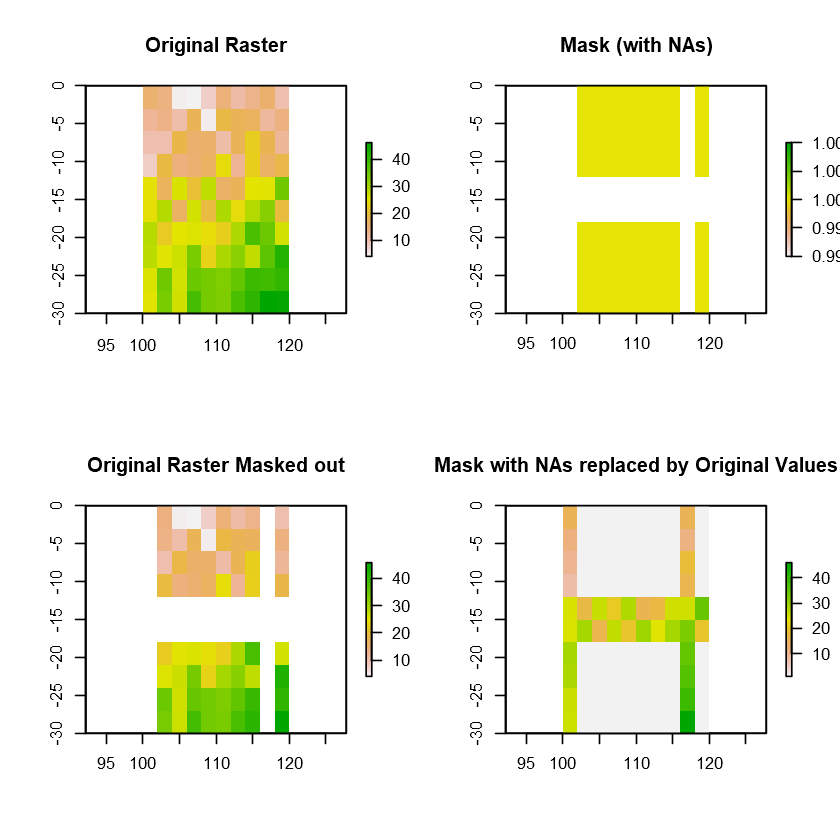

In [31]:

# Substitute the Missing Rows and Columns (i.e. containing NAs) in the Mask, with the Rows # and Columns in the Original Raster to create a Combined Raster.
r2b.coverMaskOrig = cover(r2b.Mask, r2b)


# Plot Original, Mask, Mask Out, and Combined Rasters.
par(mfrow=c(2,2))
plot(r2b, main='Original Raster')
plot(r2b.Mask, main='Mask (with NAs)')
plot(r2b.MaskedOut, main='Original Raster Masked out')
plot(r2b.coverMaskOrig, main='Mask with NAs replaced by Original Values')



# Changing the essential Spatial Attributes of a Raster



## Changing Spatial Extent

The Spatial Extent of Raster Objects can be modified using several funtions:


### 'crop()'

`crop()`: The most commonly used function to modify the extent of a raster object.
It returns a geographic subset of an object as specified by an Extent object (or any 
object from which an extent object can be extracted/created). The Extent object represent our region of interest. When the object to crop is a Raster\* object, the Extent is aligned to this object. Areas included in the Extent object, but outside the extent of the object to crop are ignored.

`drawExtent`: Allows to subset a raster object by clicking on two pionts of a plot (raster). Currently, it returns an error when used in Rmarkdown files (used to prepare this tutorial). However, you can give it a try by using the code below. Simply, remove the comment symbol (`#`) in front of the commands containing `drawExtent` or the raster object rb2.crop3. 


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 3.982552, 46.06081  (min, max)


class       : RasterLayer 
dimensions  : 5, 8, 40  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 116, -30, -15  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 16.18392, 40.84901  (min, max)


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 1.5, 2.5  (x, y)
extent      : 110, 125, -20, 5  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 


class       : RasterLayer 
dimensions  : 7, 5, 35  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 110, 120, -21, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 9.808733, 37.86698  (min, max)


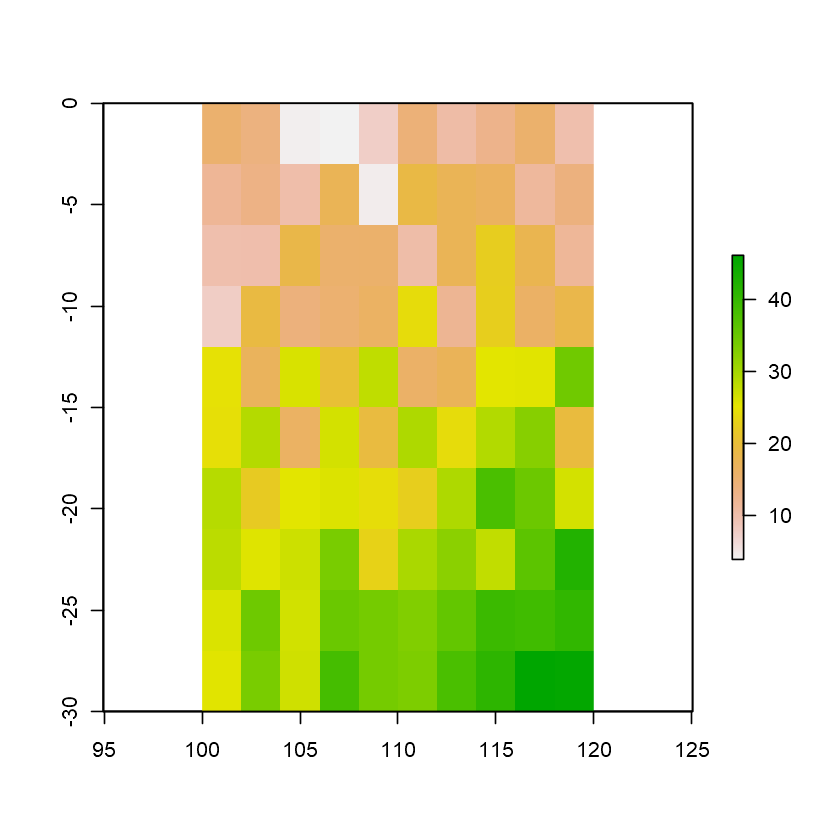

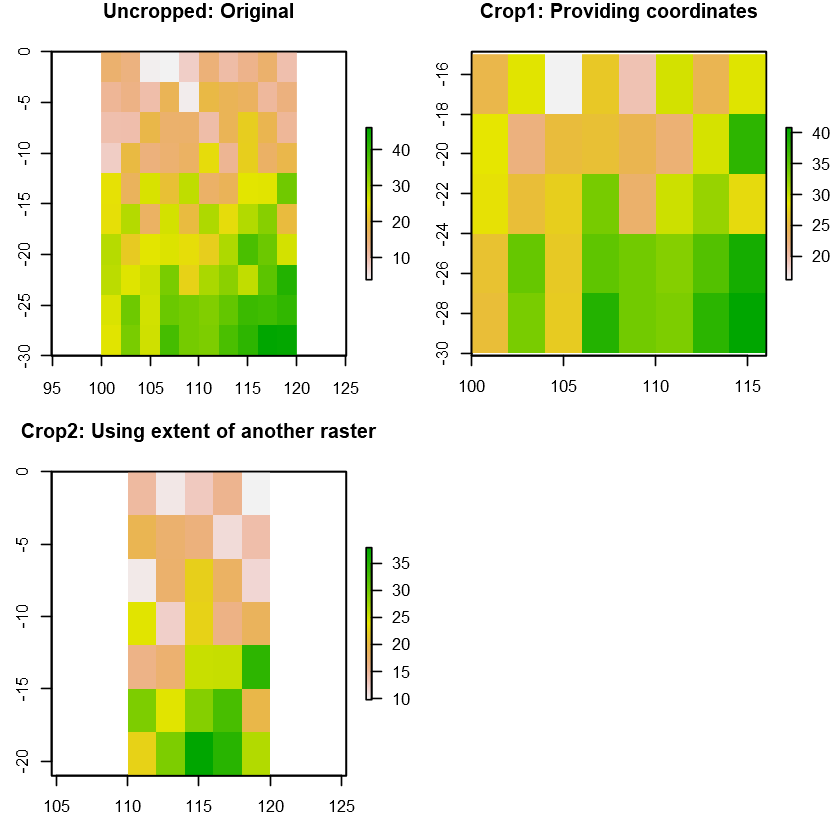

In [32]:

# It can be used in multiple ways:
r2b

# Providing the coordinates for the limits of the Extent object
r2b.crop1 = crop(r2b, extent(100,115,-40,-15))
r2b.crop1

# Obtaining the limits of the Extent object from another Spatial Object
# (a Raster, SpatiaPolygon*, SpatialLines*, SpatialPoints* object)
r2c  = raster(nrow=10, ncol=10, xmn=110, xmx=125, ymn=-20, ymx=5)
r2c
r2b.crop2 = crop(r2b, extent(r2c))
r2b.crop2

# Plotting the RasterLayer and Manually Drawing  the limits of the Extent object with 'drawExtent()'
# To try it out remove the comment symbol ('#') from the front of the commands below
plot(r2b)
#new.extent = drawExtent()  # To Select the Limits of the new Extent object click twice on the map
#r2b.crop3 = crop(r2b, new.extent)
#r2b.crop3

# Plot Original and 3 Cropped Rasters
par(mfrow=c(2,2))
plot(r2b, main="Uncropped: Original")
plot(r2b.crop1, main="Crop1: Providing coordinates")
plot(r2b.crop2, main="Crop2: Using extent of another raster")
#plot(r2b.crop3, main="Crop3: Cropped interactively")



### 'merge()'

`merge()`: Merges 2 or more Raster\* objects to create a single a new Raster object with a larger (or equal) spatial extent. 

The Raster objects must have the same origin and resolution (so their cells neatly fit into a single larger raster). If this is not the case, first adjust one of the Raster objects with use (dis)aggregate or resample (see below).

If objects overlap, the values get priority in the same order as the arguments (i.e. the values of the Raster object that is first in the sequence of arguments will be retained).

NA values are ignored (except when `overlap=FALSE`). 

`merge` can directly save the resulting Raster object into a file. 


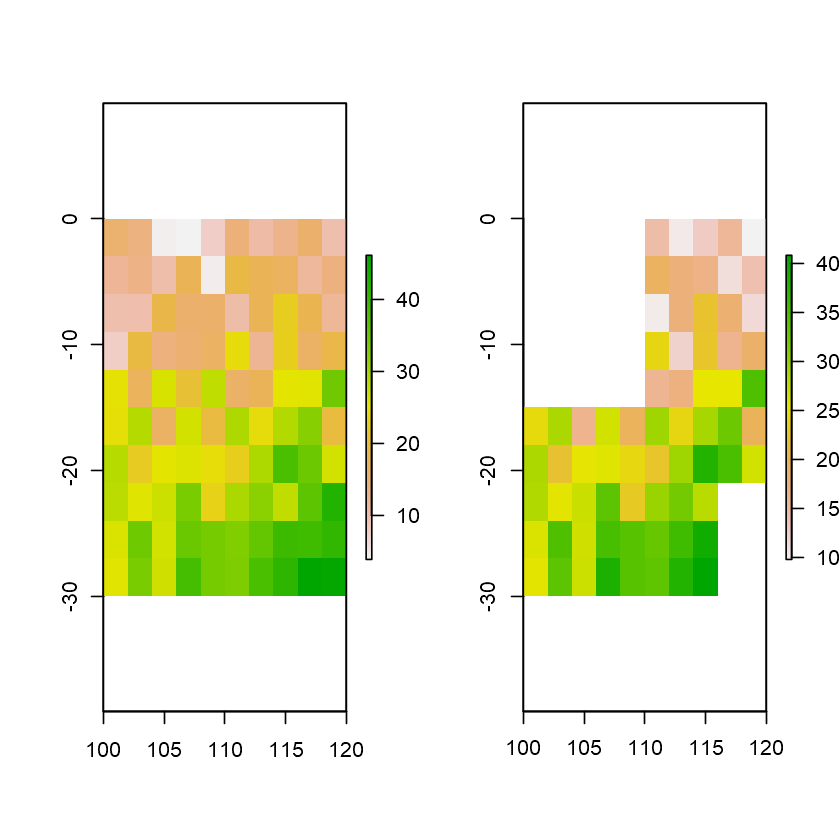

In [33]:

r2b.merge.c1andc2 = merge(r2b.crop1, r2b.crop2)  
par(mfrow=c(1,2))
plot(r2b)
plot(r2b.merge.c1andc2)



### 'trim()' and 'extend()'


#### 'trim()'
Trim (shrink) a Raster\* object by removing outer rows and columns that contain the same value (e.g. NA). The multi-layer case is analogous to the single-layer case.


In [34]:

# Single-layer case
# ~~~~~~~~~~~~~~~~

# Create raster and Add NAs
r1a.NAs = r1a
r1a.NAs[1:2,] = NA
r1a.NAs[nrow(r1a.NAs),] = NA

# Trim
r1a.trim = trim(r1a.NAs, values=NA)

# Visualize results
dim(r1a); dim(r1a.NAs); dim(r1a.trim)
summary(r1a)[6]; summary(r1a.NAs)[6]; summary(r1a.trim)[6]  # Count of NAs


# Multi-layer case
# ~~~~~~~~~~~~~~~~
s1a.NAs = stack(r1a.NAs, r1a.NAs)

# Trim
s1a.trim = trim(s1a.NAs, values=NA)

# Visualize results
dim(s1a); dim(s1a.NAs); dim(s1a.trim)
# summary(s1a)[6]; summary(s1a.NAs)[6]; summary(s1a.trim)[6]  # Summary doesn't work for multi-layered objects


[1] 10 15  1

[1] 10 15  1

[1]  7 15  1

[1] 0

[1] 45

[1] 0

[1] 10 15  2

[1] 10 15  2

[1]  7 15  2


#### 'extend()'
Extend returns a Raster* object with a larger spatial extent, by adding new rows and/or columns with a give value (e.g.NA). The output Raster object has the outer minimum and maximum coordinates of the input Raster and Extent arguments. Thus, all of the cells of the original raster are included.

The new extent is provided via the `y` argument. It can be provided in two different ways:
 * Providing and extent object. This should be a numeric vector of 1, 2, or 4 elements.
 * Providing an object from which an extent can be extracted
 * Providing a numeric vector with the number of rows and columns to be added at each side. This vector can have length 2 (i.e.rows and columns) or length 1 if the number of rows and columns is equal.

The argument `value` is used to assign a value to the new cells.

The multi-layer case is analogous to the single-layer case

This function has replaced function "expand" (to avoid a name conflict with the Matrix package). 


In [35]:

# Single-layer case
# ~~~~~~~~~~~~~~~~

# This function has replaced function "expand" (to avoid a name conflict with the Matrix package). 
r1a
r2a

# Method 1: Providing a new extent object
new.extent = extent(90, 125, -45, 10)
r2a.extended.m1 = extend(r2a, y=new.extent, value=NA)
r2a.extended.m1

# Method 2: Providing an object from which an extent can be extracted
r2a.extended.m2 = extend(r2a, y=r1a, value=NA)
r2a.extended.m2

# Method 3: Providing a numeric vector with the number of rows and columns to be added at each side.
r2a.extended.m3 = extend(r2a, y=c(3,5), value=NA)
r2a.extended.m3


# Multi-layer case
# ~~~~~~~~~~~~~~~~

# Create multi-layer objects
s1a = stack(r1a, r1a)
s2a = stack(r2a, r2a)

# This function has replaced function "expand" (to avoid a name conflict with the Matrix package). 
s1a
s2a

# Method 1: Providing a new extent object
new.extent = extent(90, 125, -45, 10)
s2a.extended.m1 = extend(s2a, y=new.extent, value=NA)
s2a.extended.m1

# Method 2: Providing an object from which an extent can be extracted
s2a.extended.m2 = extend(s2a, y=s1a, value=NA)
s2a.extended.m2

# Method 3: Providing a numeric vector with the number of rows and columns to be added at each side.
s2a.extended.m3 = extend(s2a, y=c(3,5), value=NA)
s2a.extended.m3


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 1  (min, max)


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 100  (min, max)


class       : RasterLayer 
dimensions  : 18, 17, 306  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 90, 124, -45, 9  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 100  (min, max)


class       : RasterLayer 
dimensions  : 60, 180, 10800  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 100  (min, max)


class       : RasterLayer 
dimensions  : 16, 20, 320  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 90, 130, -39, 9  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 100  (min, max)


class       : RasterStack 
dimensions  : 10, 15, 150, 2  (nrow, ncol, ncell, nlayers)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
names       : layer.1, layer.2 
min values  :       1,       1 
max values  :       1,       1 


class       : RasterStack 
dimensions  : 10, 10, 100, 2  (nrow, ncol, ncell, nlayers)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
names       : layer.1, layer.2 
min values  :       1,       1 
max values  :     100,     100 


class       : RasterBrick 
dimensions  : 18, 17, 306, 2  (nrow, ncol, ncell, nlayers)
resolution  : 2, 3  (x, y)
extent      : 90, 124, -45, 9  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1, layer.2 
min values  :       1,       1 
max values  :     100,     100 


class       : RasterBrick 
dimensions  : 60, 180, 10800, 2  (nrow, ncol, ncell, nlayers)
resolution  : 2, 3  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1, layer.2 
min values  :       1,       1 
max values  :     100,     100 


class       : RasterBrick 
dimensions  : 16, 20, 320, 2  (nrow, ncol, ncell, nlayers)
resolution  : 2, 3  (x, y)
extent      : 90, 130, -39, 9  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer.1, layer.2 
min values  :       1,       1 
max values  :     100,     100 



## Changing Resolution


### Changing the Resolution by an Integer Factor (e.g. 2 times smaller)

It can be achieved with the functions: `aggregate` and `disaggregate`.

Changing the Resolution by an Integer Factor is not always possible


#### 'aggregate()'

`aggregate`: Aggregates a Raster* object to create a new RasterLayer or RasterBrick with a lower resolution (i.e. fewer larger cells). Aggregation groups rectangular areas to create this larger cells. The value for the resulting cells is computed with a user-specified function (e.g. `mean`). Different aggregation functions can be used in the x and y direction.


In [36]:

r2b
r2b.aggrfactor2 = aggregate(r2b, fact=2, fun=mean)
r2b.aggrfactor2


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 3.982552, 46.06081  (min, max)


class       : RasterLayer 
dimensions  : 5, 5, 25  (nrow, ncol, ncell)
resolution  : 4, 6  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 8.936027, 42.76626  (min, max)



#### 'disaggregate()'

`disaggregate`: Does the opposite than 'aggregate'. It disaggregates a RasterLayer to create a new RasterLayer with a higher resolution (i.e. more smaller cells). The values in the new RasterLayer are the same as in the larger original cells; unless you specify method="bilinear", in which case values are locally interpolated (using the resample function). 


In [37]:

r2b
r2b.aggrfactor2
r2b.aggrf2.disaggrf2a = disaggregate(r2b.aggrfactor2, fact=2)  # Cells same values as original
r2b.aggrf2.disaggrf2a
r2b.aggrf2.disaggrf2b = disaggregate(r2b.aggrfactor2, fact=2, method='bilinear')  # Cells with locally interpolated values
r2b.aggrf2.disaggrf2b


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 3.982552, 46.06081  (min, max)


class       : RasterLayer 
dimensions  : 5, 5, 25  (nrow, ncol, ncell)
resolution  : 4, 6  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 8.936027, 42.76626  (min, max)


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 8.936027, 42.76626  (min, max)


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 7.922057, 45.89115  (min, max)



Plot original, aggregated, and disaggregated rasters.


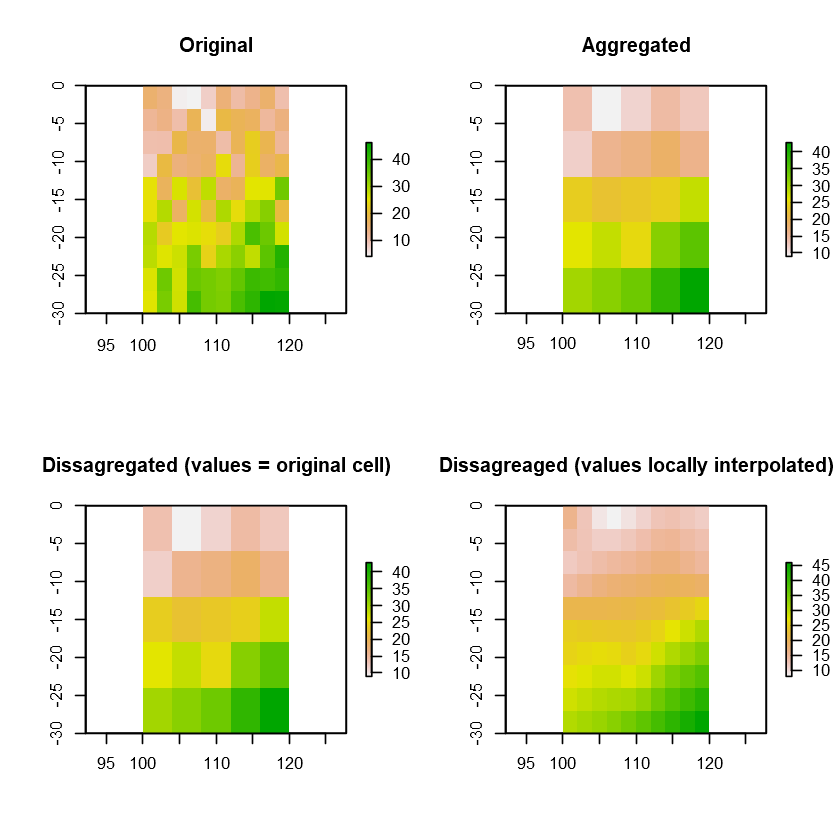

In [38]:

par(mfrow=c(2,2))
plot(r2b, main="Original")
plot(r2b.aggrfactor2, main="Aggregated")
plot(r2b.aggrf2.disaggrf2a, main="Dissagregated (values = original cell)")  # Looks the same as disaggregated cells have the same value than the original cell
plot(r2b.aggrf2.disaggrf2b, main="Dissagreaged (values locally interpolated)")



### Changing the Resolution in Other Cases

 
#### Shift

`shift`: Moves the location of a Raster\* (or Spatial\*) object in the x and/or y direction. Important arguments:

* `x`: Numeric argument containing the shift in the horizontal (i.e. longitude) direction
* `y`: Numeric argument containing the shift in the vertical (i.e. latitude) direction


In [39]:

# Shift raster 10 degress of longitude and 5 degrees of latitude
r1a
r1a.shift.x10.y5 = shift(r1a, x=10, y=5)
r1a.shift.x10.y5


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 1  (min, max)


class       : RasterLayer 
dimensions  : 10, 15, 150  (nrow, ncol, ncell)
resolution  : 24, 18  (x, y)
extent      : -170, 190, -85, 95  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 1  (min, max)


 
#### Resample

`resample`: Transfers values between Raster\* objects with different origin and/or resolution. If Raster\* objects also have different projections (i.e. coordinate reference system), `projectRaster` can be used to re-project one of the objects (see next section).

Before using 'resample', the use of other raster functions should be considered 
(i.e. `aggregate`, `disaggregate`, `crop`, `extend`, `merge`) as they might be more appropriate to achieve the required task.


`method`: Argument indicating the method to use to compute the value for the new RasterLayer:

* "bilinear" for bilinear interpolation
* "ngb" for nearest neighbor


class       : RasterLayer 
dimensions  : 5, 5, 25  (nrow, ncol, ncell)
resolution  : 72, 36  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 25  (min, max)


class       : RasterLayer 
dimensions  : 15, 15, 225  (nrow, ncol, ncell)
resolution  : 24, 12  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 


class       : RasterLayer 
dimensions  : 5, 5, 25  (nrow, ncol, ncell)
resolution  : 72, 36  (x, y)
extent      : -155, 205, -75, 105  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 1, 25  (min, max)


class       : RasterLayer 
dimensions  : 20, 20, 400  (nrow, ncol, ncell)
resolution  : 18, 9  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 


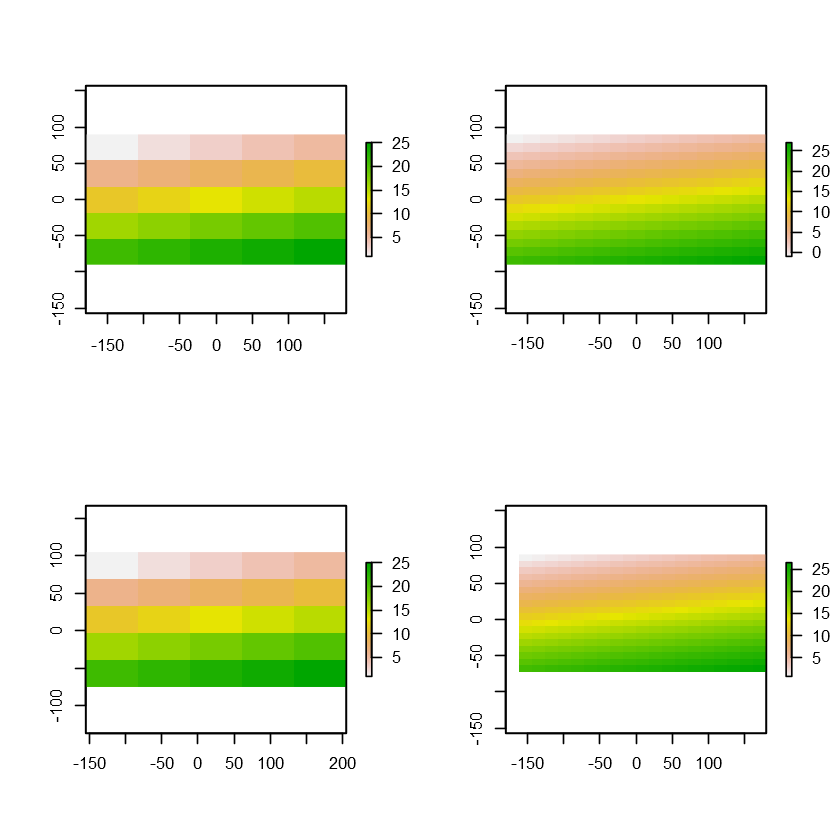

In [40]:

# Rasters with different dimensions and resolutions, but equal extents and projections
# ------------------------------------------------------------------------------------

# Create and Fill raster to be resampled
r.10x10 = raster(nrow=5, ncol=5)
r.10x10[] = 1:ncell(r.10x10)

# Create raster to be resampled to
r.15x15 = raster(nrow=15, ncol=15)
r.10x10
r.15x15

# Resample
r.15x15.bl = resample(r.10x10, r.15x15, method='bilinear')


# Rasters with different dimensions, resolutions and extents, but equal projections
# ---------------------------------------------------------------------------------

# Create raster to be resampled by shifting the previous raster (now also different extents)
r.10x10.shift.x25.y15 = shift(r.10x10, x=25, y=15) # Shift raster 10 degs. of long and 15 degs. of lat.
r.10x10.shift.x25.y15

# Create raster to be resampled to
r.20x20 = raster(nrow=20, ncol=20)
r.20x20

# Resample
r.20x20.sbl = resample(r.10x10.shift.x25.y15, r.20x20, method='bilinear')


# Plot rasters
# ------------
par(mfrow=c(2,2))
plot(r.10x10)
plot(r.15x15.bl)
plot(r.10x10.shift.x25.y15)
plot(r.20x20.sbl)


# For rasters with different dimensions, resolutions, extents, and projections use 
# `projectRaster` to reproject raster, see next.



## Defining & Changing Spatial Projections


### Define a Spatial Projection

`projection`: Get or set the Cordinate Reference System (CRS) of a Raster\* object. It Obtains or Adds information for a Raster object, but doesn't change the Projection.


In [41]:

r2b
projection(r2b)

r2d = raster(ncol=10, nrow=10, xmn=-1000, xmx=1000, ymn=-100, ymx=900)
r2d  # Provided an strange Spatial Extent, so CRS = NA
new.CRS = crs("+proj=lcc +lat_1=48 +lat_2=33 +lon_0=-100 +ellps=WGS84") 
projection(r2d) =new.CRS
r2d


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 3.982552, 46.06081  (min, max)


[1] "+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0"

class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 200, 100  (x, y)
extent      : -1000, 1000, -100, 900  (xmin, xmax, ymin, ymax)
coord. ref. : NA 


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 200, 100  (x, y)
extent      : -1000, 1000, -100, 900  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=lcc +lat_1=48 +lat_2=33 +lon_0=-100 +ellps=WGS84 



### Changing a Spatial Projection

`projectRaster`: Project the values of a Raster\* object to a new Raster\* object with another projection (i.e. CRS). 

It can be done by:

* _Providing the new projection as a single argument_: The function sets the extent and resolution of the new object. 

* _Providing a Raster\* object with the properties that the input data should be projected to_: Has more control over the transformation (e.g. to assure that the new object lines up with other datasets).


class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 2, 3  (x, y)
extent      : 100, 120, -30, 0  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 3.982552, 46.06081  (min, max)


class       : RasterLayer 
dimensions  : 69, 142, 9798  (nrow, ncol, ncell)
resolution  : 44200, 68200  (x, y)
extent      : -17765520, -11489120, 12121026, 16826826  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=lcc +lat_1=48 +lat_2=33 +lon_0=-100 +ellps=WGS84 
data source : in memory
names       : layer 
values      : -2.206867, 49.39829  (min, max)


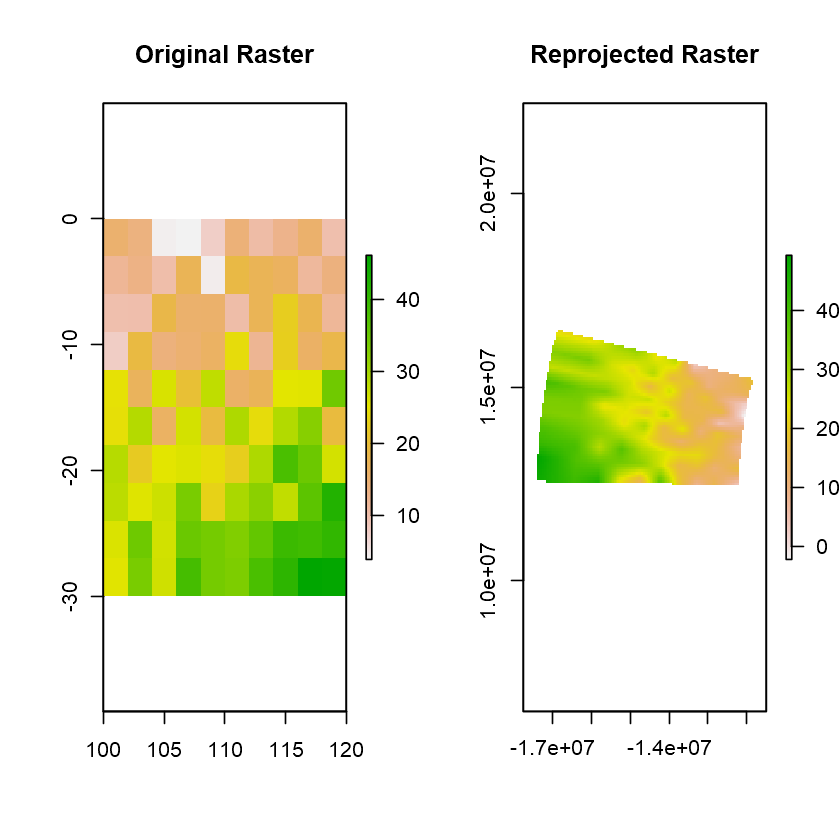

In [42]:

r2b.newCRS = projectRaster(r2b, crs=new.CRS)
r2b
r2b.newCRS
 # Plot the Original and Re-projected Rasters
par(mfrow=c(1,2))
plot(r2b, main="Original Raster")
plot(r2b.newCRS, main="Reprojected Raster")



## Setting the Spatial Attributes of All Rasters to the same values at once

The Extent, Resolution, and Projection can be set to be the same in all rasters using the `spatial_sync_raster` function from the `spatial.tools` package.



# Raster Prediction

## Interpolation

Interpolation predicts values for the cells in a raster from the values of a limited number of sample data points (cells).

The raster function `interpolate` returns a raster object with predictions, and requires (at least): a raster object and a model object. The models uses the cell coordinates as predictor variables and the cell values as the dependent variable. Here we will use a Thin Plate Spline Model to create (i.e. fit) the model object. Multiple models can be fitted using:

* `gstat` package: inverse distance weighted (IDW), Kriging, ordinary Kriging, universal Kriging, co-Kriging

* `fields` package: thin plate spline, cubic splines, Kriging

* Could write your own function to do so


Loading required package: spam
Warning message:
"package 'spam' was built under R version 3.5.3"Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-2 (2019-03-07) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following objects are masked from 'package:base':

    backsolve, forwardsolve

See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 


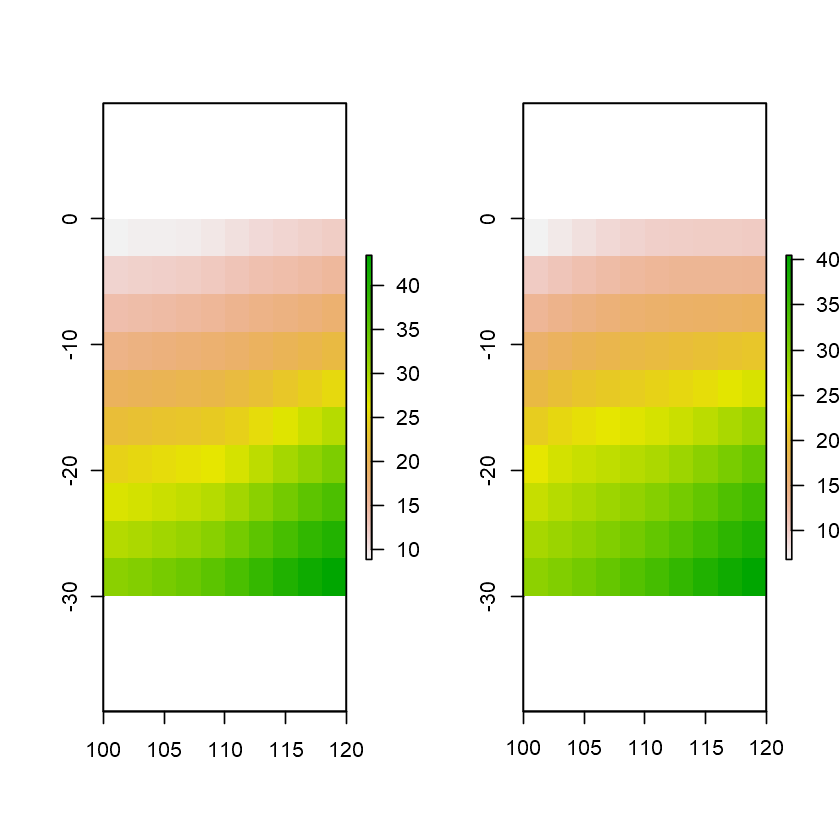

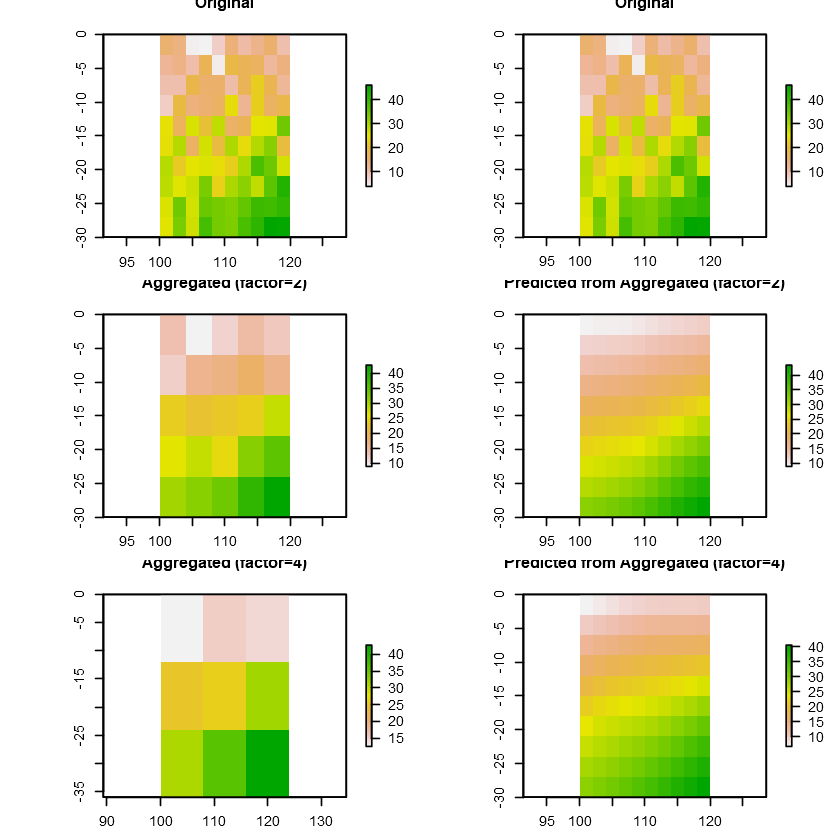

In [43]:

library(fields)   # For function 'Tps': Thin plate spline (Tps)

# Agregate r2b layer to create a corse layer
r2b.aggr2 = aggregate(r2b, fact=2)
r2b.aggr4 = aggregate(r2b, fact=4)
# Get raster Coordinates
r2b.aggr2.xy = data.frame(xyFromCell(r2b.aggr2, 1:ncell(r2b.aggr2)))
r2b.aggr4.xy = data.frame(xyFromCell(r2b.aggr4, 1:ncell(r2b.aggr4)))
# Get rater values
r2b.aggr2.vals = getValues(r2b.aggr2)
r2b.aggr4.vals = getValues(r2b.aggr4)
# Fit Thin Plate Spline (smoothing parameter chosen by genralized cross-valuations; see Tps help)
r2b.aggr2.tps = Tps(r2b.aggr2.xy, r2b.aggr2.vals)
r2b.aggr4.tps = Tps(r2b.aggr4.xy, r2b.aggr4.vals)
# Create 'blank' rasters (i.e. spatial features of r2b, but values=NA) to contain Pred. Values (i.e. Interpolation)
r2b.aggr2.pred = r2b.aggr4.pred = raster(r2b)
# Interpolate
r2b.aggr2.pred = interpolate(r2b.aggr2.pred, r2b.aggr2.tps)
r2b.aggr4.pred = interpolate(r2b.aggr4.pred, r2b.aggr4.tps)
# View Interpolated Surfaces
par(mfrow=c(1,2))
plot(r2b.aggr2.pred); plot(r2b.aggr4.pred)
# Mask Interpolated Sufaces to Extent & Resolution of Initial Raster
r2b.aggr2.pred = mask(r2b.aggr2.pred, r2b)
r2b.aggr4.pred = mask(r2b.aggr4.pred, r2b)
# Plot Original Raster, Aggregated Rasters (by factor of 2 and 3), and Predicted (Spline Interpolated) Rasters
par(mfrow=c(3,2))
plot(r2b, main="Original")
plot(r2b, main="Original")
plot(r2b.aggr2, main="Aggregated (factor=2)")
plot(r2b.aggr2.pred, main="Predicted from Aggregated (factor=2)")
plot(r2b.aggr4, main="Aggregated (factor=4)")
plot(r2b.aggr4.pred, main="Predicted from Aggregated (factor=4)")  # Similar results because of regular filling

# Remove Objects containing the string "aggr" (i.e. those created and used in this section)
rm(list = ls(pattern="aggr"))



## Prediction

As with the function `interpolate`, the function `predict` also returns a raster object with spatial predictions and has as inputs a raster object and a model object. However, these are different than in the function 'interpolate':

* _Raster object_: is typically a multi-layer raster (i.e. RasterStack or RasterBrick)

* _Model object_: is a model of any class that has a 'predict' method, including: glm, gam, randomForest, and is fitted to raster data.

This approach of predicting from a fitted model to raster data is commonly used in remote sensing (e.g. for the classification of satellite images) and in ecology (e.g. for species distribution modelling).

For further informatin see help pages for [the predict function in the package raster](http://127.0.0.1:25588/library/raster/html/predict.html) and the package [dismo](http://127.0.0.1:25588/library/dismo/html/dismo-package.html).


class       : RasterLayer 
dimensions  : 10, 16, 160  (nrow, ncol, ncell)
resolution  : 22.5, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 0.6505798, 40.74249  (min, max)


class       : RasterLayer 
dimensions  : 10, 16, 160  (nrow, ncol, ncell)
resolution  : 22.5, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 23.32467, 98.55239  (min, max)


class       : RasterBrick 
dimensions  : 10, 16, 160, 2  (nrow, ncol, ncell, nlayers)
resolution  : 22.5, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : Temperature,   Humidity 
min values  :   0.6505798, 23.3246739 
max values  :    40.74249,   98.55239 


class       : RasterLayer 
dimensions  : 10, 16, 160  (nrow, ncol, ncell)
resolution  : 22.5, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 0, 1  (min, max)


[1] NA NA NA NA NA NA NA  0 NA NA NA NA NA NA  0 NA NA NA NA NA NA NA NA NA  0
 [26]  0 NA NA NA NA  0 NA NA NA NA  0 NA  0 NA  0 NA NA NA NA NA NA  0 NA NA NA
 [51] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  0 NA NA NA NA
 [76] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[101] NA NA NA NA  1 NA NA  1  1  1  1 NA NA NA  0 NA  0 NA NA NA NA NA NA  1 NA
[126] NA  1 NA NA NA NA NA  0 NA NA NA  1 NA NA NA NA  1 NA NA NA NA NA NA NA  0
[151]  0 NA NA NA NA  1  1  1 NA NA

1,7,12
1,10,12
1,7,9
1,10,12
1,8,15
1,9,9
1,8,12
1,7,15
1,7,13
1,7,15
1,7,14


pa,Temperature,Humidity
1,28.345331,71.67556
1,29.562347,96.04835
1,22.327019,73.95020
1,29.562347,96.04835
1,35.744430,82.18281
1,23.191792,91.07480
1,30.937053,78.59406
1,37.379168,74.54298
1,33.130567,70.48572
1,37.379168,74.54298



Call:
glm(formula = pa ~ ., data = pa.envcond.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5680  -0.1218   0.0292   0.1629   0.5633  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.155202   0.211340  -5.466 8.73e-06 ***
Temperature  0.032094   0.005519   5.816 3.44e-06 ***
Humidity     0.011837   0.002238   5.289 1.40e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.08091772)

    Null deviance: 7.5000  on 29  degrees of freedom
Residual deviance: 2.1848  on 27  degrees of freedom
AIC: 14.546

Number of Fisher Scoring iterations: 2


  |======================================================================| 100%



class       : RasterLayer 
dimensions  : 10, 16, 160  (nrow, ncol, ncell)
resolution  : 22.5, 18  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : -0.7878455, 1.235693  (min, max)


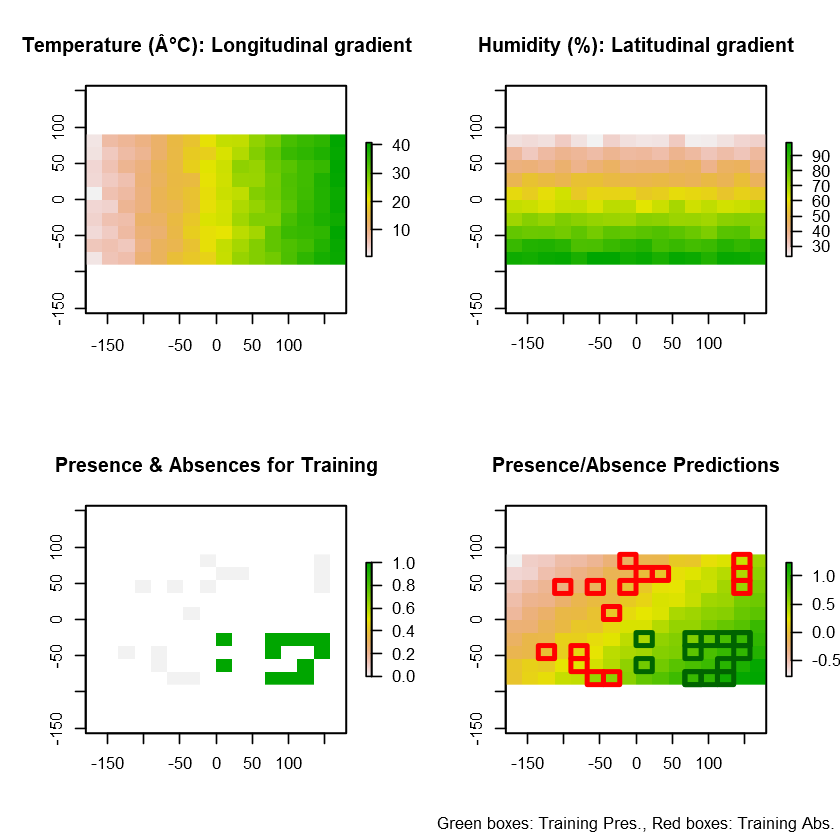

In [44]:

# Temperature Raster: With Gradient from West to East.
temp.ras = raster(nrow=10, ncol=16)
temp.ras[] = colFromCell(temp.ras,1:ncell(temp.ras))*10/4 + rnorm(ncell(temp.ras),sd=1)
temp.ras

# Humidity Raster: With Gradient from North to South.
humid.ras = raster(nrow=10, ncol=16)
humid.ras[] = 20 + rowFromCell(humid.ras,1:ncell(humid.ras)) * 7.5 + rnorm(ncell(humid.ras),sd=2)
humid.ras

# Create a RasterBrick object with Environmental Conditions (Temperature & Humidity)
EnvCond.brick = brick(temp.ras,humid.ras)
names(EnvCond.brick) = c("Temperature","Humidity")
EnvCond.brick

# Presence & Absence Cells
  # Present: High Temp & High Humidity
p = cbind(floor(runif(15,min=7,max=11)),floor(runif(15,min=9,max=17)))
  # Absent: 1-5: Low Temp & Low Humidity; 6-10: Low Temp & High Humidity; 11-15: High Temp & Low Humidity 
a = cbind( floor(c(runif(10,min=1,max=6),runif(5,min=6,max=11))), 
           floor(c(runif(5,min=1,max=9),runif(5,min=9,max=17),runif(5,min=1,max=9))) )

# Presence/Absece Raster (for Visualization)		  
pa.ras = raster(nrow=10, ncol=16)
pa.ras[] = NA
pa.ras[p] = 1
pa.ras[a] = 0
pa.ras
pa.ras[]

# Plot Rasters
par(mfrow=c(2,2))
plot(temp.ras, main="Temperature (Â°C): Longitudinal gradient")
plot(humid.ras, main="Humidity (%): Latitudinal gradient")
plot(pa.ras, main="Presence & Absences for Training")

# Extract Values for Points
pa.xy = rbind(cbind(1,p), cbind(0,a))
pa.xy
cells.indices = cellFromRowCol(EnvCond.brick, row=pa.xy[,2], col=pa.xy[,3])
pa.envcond.df = data.frame(cbind(pa=pa.xy[,1], extract(EnvCond.brick, cells.indices)))
#pa.envcond.df = data.frame(cbind(pa=pa.xy[,1], extract(EnvCond.brick, pa.xy[,2:3])))
pa.envcond.df

# Fit Model (GLM)
glm.fit = glm(formula=pa~., data=pa.envcond.df)
summary(glm.fit)

# Predict to a Raster
pred.ras = predict(EnvCond.brick, glm.fit, progress='text')
pred.ras

# Plot Predictions & PA Points
plot(pred.ras, main="Presence/Absence Predictions", 
     sub="Green boxes: Training Pres., Red boxes: Training Abs.")
p.rc = rowColFromCell(pred.ras, cells.indices[1:15])
a.rc = rowColFromCell(pred.ras, cells.indices[16:30])
#p.rc; a.rc
for( cnt in 1:15 ) {
	plot(extent(pred.ras, p.rc[cnt,1], p.rc[cnt,1], p.rc[cnt,2], p.rc[cnt,2]), add=TRUE, col='darkgreen', lwd=3)
	plot(extent(pred.ras, a.rc[cnt,1], a.rc[cnt,1], a.rc[cnt,2], a.rc[cnt,2]), add=TRUE, col='red', lwd=3)
}



# Other GIS operations with rasters in R

First we create a dataset with simulated elevation values to be used in this section.


[1] 15.246057 13.835878  4.378621  3.982552  7.552386 14.421652 10.467678
  [8] 12.718751 15.447149  9.808733 11.697501 13.190300 10.060452 17.322481
 [15]  4.410175 18.967678 17.363584 16.578576 11.228219 13.908983  9.824900
 [22]  9.964634 18.635407 15.451579 15.554844 10.357431 17.440563 22.323201
 [29] 17.967676 11.558433  7.798949 19.202665 14.020813 15.063038 16.315317
 [36] 24.169308 12.073855 22.482555 16.003644 18.423817 24.762513 16.976962
 [43] 26.225652 20.340547 27.932023 15.882135 17.167371 25.418906 25.491358
 [50] 34.446906 24.584532 28.770872 16.183922 26.537668 19.325882 29.398141
 [57] 24.216056 28.917673 32.526370 19.478269 28.650276 22.027540 25.379965
 [64] 25.843143 24.350490 22.497837 29.326101 37.866976 34.800105 26.542249
 [71] 28.326795 25.602696 27.048742 33.677485 23.015148 29.715735 32.088301
 [78] 27.885719 36.242070 42.037256 26.017336 34.579905 26.707533 34.967134
 [85] 33.988506 32.962830 35.561309 39.427861 38.899311 40.380573 25.593526
 [92] 33.581370 26.835998 38.384453 33.952836 33.371777 37.891973 40.849015
 [99] 46.060811 45.724338

[1] 193.28610 179.18430  84.61173  80.65104 116.34938 185.04204 145.50230
  [8] 168.01303 195.29702 138.91285 157.80053 172.72853 141.43004 214.05033
 [15]  84.92727 230.50231 214.46136 206.61128 153.10771 179.91535 139.07452
 [22] 140.47186 227.17959 195.34131 196.37396 144.39983 215.23116 264.05753
 [29] 220.50228 156.40985 118.81501 232.85217 181.03365 191.45590 203.97869
 [36] 282.51860 161.56407 265.65107 200.86196 225.06369 288.45066 210.59514
 [43] 303.08204 244.23099 320.14575 199.64687 212.49923 295.01458 295.73910
 [50] 385.29458 286.67084 328.53425 202.66474 306.20220 234.08434 334.80693
 [57] 282.98608 330.00225 366.08922 235.60822 327.32829 261.10092 294.62517
 [64] 299.25695 284.33042 265.80389 334.08653 419.49528 388.82657 306.24802
 [71] 324.09347 296.85248 311.31294 377.60037 270.97700 337.98287 361.70853
 [78] 319.68271 403.24622 461.19808 300.99888 386.62457 307.90086 390.49686
 [85] 380.71058 370.45382 396.43862 435.10413 429.81863 444.63125 296.76078
 [92] 376.63922 309.18550 424.67006 380.35388 374.54329 419.74525 449.31567
 [99] 501.43363 498.06891

[1] 80.65104

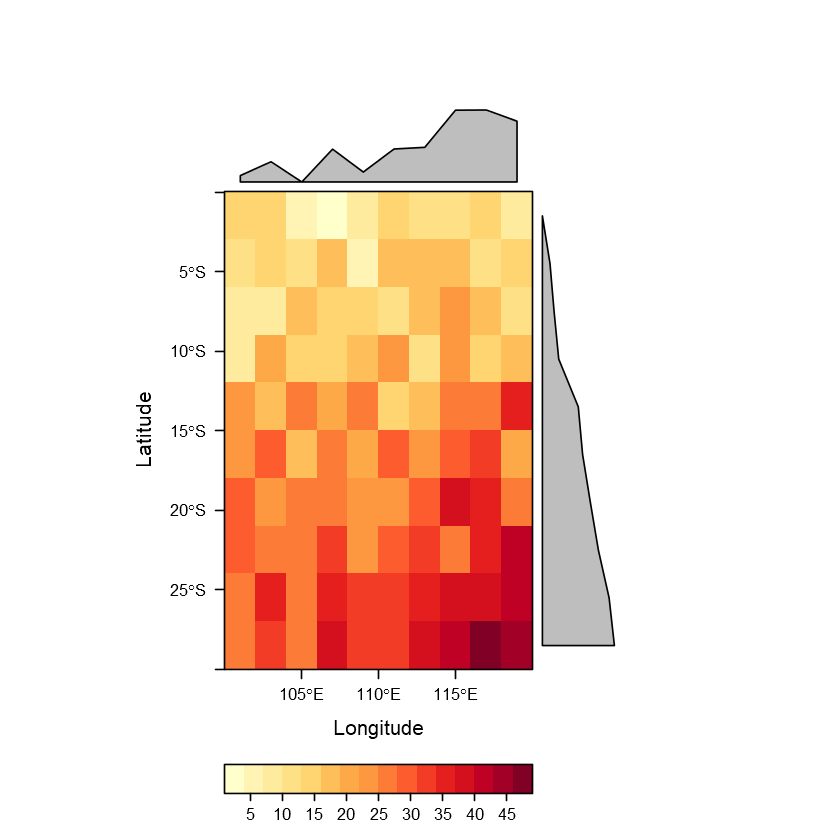

In [45]:

# rb2 created above (see 'Visualising Rasters') contains Latitudinal and Longitudinal gradients, 
# with the former 3 times stronger. 
r2b[]
levelplot(r2b, par.settings=YlOrRdTheme)

# Making all values positive and stretched out by 10 (to recreate some decent 'elevation')
r2b.elev = (r2b + abs(cellStats(r2b, min)) + 0.1) * 10
r2b.elev[]
cellStats(r2b.elev, min)



## Distance & Direction


### Distance functions

Attention must be paid to the raster projection as it can noticiably affect the results (small areas often use a UTM projection, while large areas/world oftne use '+proj=longlat'). Illustrations of the different results obtained using different projections can be seen in the examples for the functions `pointDistance` and `gridDistance` below.

The units of the distances returned by all distance functions in the package `raster` are:

* _Meters_ if the RasterLayer is not projected (i.e. '+proj=longlat')
* _Map units (typically also meters)_ if the RasterLayer is projected.

More advanced distance function can be found in other packages, including:

* `gdistance`: Computes Distances and Routes on Geographical Grids. It includes advanced distances, such as: cost distance and resistance distance. See package vignette [here](https://cran.r-project.org/web/packages/gdistance/vignettes/gdistance1.pdf). A tutorial on how to calculate Cummulative Distances usign this package can be found [here](http://personal.colby.edu/personal/m/mgimond/Spatial/Distance_rook_vs_queen_vs_knight.html)
* `geosphere`: Uses spherical trigonometry for geographic applications. It computes great-circle distances (and related measures)for angular (i.e. spherical longitude/latitude coordinates) locations. See package vignette [here](https://cran.r-project.org/web/packages/geosphere/vignettes/geosphere.pdf)


`distance`: Computes the distance from all NA cells to cells that are not NA. 
 

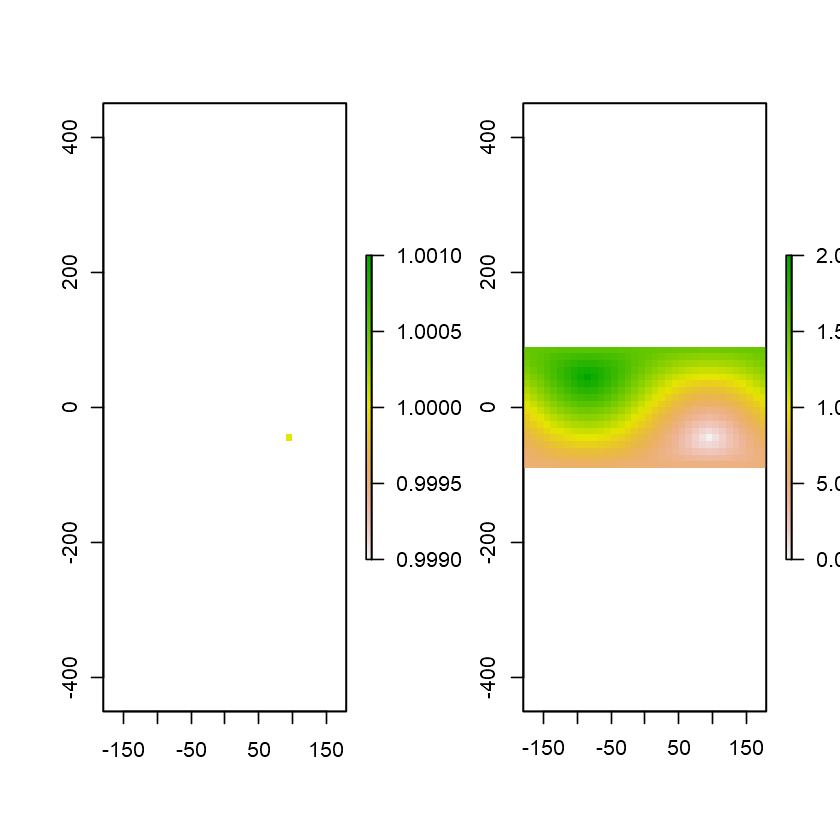

In [46]:

# Create and Fill raster with values (all cells = NA, but one 'half-way' in the Souther hemisphere
r = raster(ncol=18*2,nrow=9*2) # 1 cell for each 10x10 degrees
r[] = NA
r[cellFromXY(r, cbind(90,-45))] = 1

# Compute distances. NOTE: Using a representation of 'Earth` (i.e. ~ Spheric), so Distances first increase and they decrease.
r.dists = distance(r)  

# Plot rasters
par(mfrow=c(1,2))
plot(r)
plot(r.dists)



`distanceFromPoints`: Computes the distance from a set of points to all cells of a Raster\* object.


class       : RasterLayer 
dimensions  : 18, 36, 648  (nrow, ncol, ncell)
resolution  : 10, 10  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 394171.6, 19626586  (min, max)


class       : RasterLayer 
dimensions  : 18, 36, 648  (nrow, ncol, ncell)
resolution  : 10, 10  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 5, 295.1694  (min, max)


class       : RasterLayer 
dimensions  : 18, 36, 648  (nrow, ncol, ncell)
resolution  : 10, 10  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : 394171.6, 14705105  (min, max)


class       : RasterLayer 
dimensions  : 18, 36, 648  (nrow, ncol, ncell)
resolution  : 10, 10  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +ellps=WGS84 
data source : in memory
names       : layer 
values      : 5, 194.5508  (min, max)


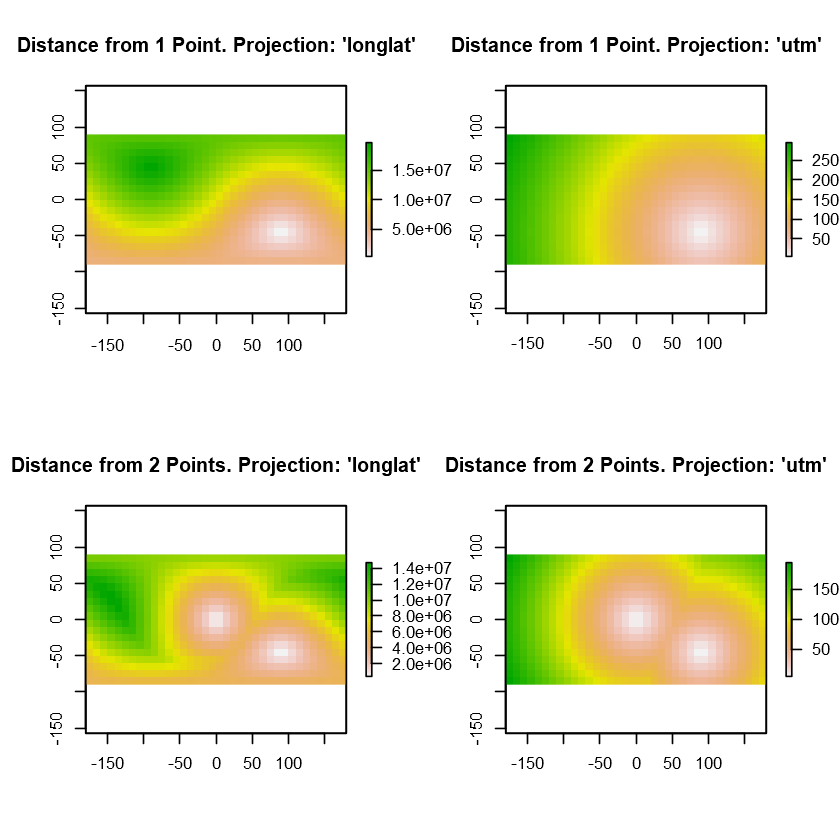

In [47]:

# Distance from 1 point
# =====================
 # Projection = 'longlat'
 # ----------------------
r = raster(ncol=18*2,nrow=9*2) # 1 cell for each 10x10 degrees
point1.xy = c(90,-45)
d.point1.longlat = distanceFromPoints(r, point1.xy)
d.point1.longlat
 # Projection = 'utm'
 # ------------------
crs(r) = '+proj=utm +zone12 +datum=WGS84' # Change projection
d.point1 = distanceFromPoints(r, point1.xy)
d.point1.utm = distanceFromPoints(r, point1.xy)
d.point1.utm

# Distance from 2 points
# ======================
 # Projection = 'longlat'
 # ----------------------
r = raster(ncol=18*2,nrow=9*2) # 1 cell for each 10x10 degrees
points2n3.xy = cbind(c(0,90),c(0,-45))
d.points2n3.longlat = distanceFromPoints(r, points2n3.xy)
d.points2n3.longlat
 # Projection = 'utm'
 # ------------------
crs(r) = '+proj=utm +zone12 + datum=WGS84' # Change projection
d.points2n3.utm = distanceFromPoints(r, points2n3.xy)
d.points2n3.utm

# Plot Distances
# ==============
par(mfrow=c(2,2))
plot(d.point1.longlat, main="Distance from 1 Point. Projection: 'longlat'")
plot(d.point1.utm, main="Distance from 1 Point. Projection: 'utm'")
plot(d.points2n3.longlat, main="Distance from 2 Points. Projection: 'longlat'")
plot(d.points2n3.utm, main="Distance from 2 Points. Projection: 'utm'")



`pointDistance`: Computes the shortest geographic distance between two (set of) points. When sets of points are given, if both sets have:

* _Equal number of points_: The distance between each point and the corresponding point in the other set is calculated, except if the argument allpairs is TRUE (i.e. `allpairs=TRUE`).
* _Different number of points_: The distance between each possible pair of points among sets is calculated.


Argument `lonlat`: Logical. If:

* TRUE: Coordinates should be in degrees. The distance is calculated on the World Geodetic System (WGS) ellipsoid. The units of the calculated distances are meters. 
* FALSE: Coordinates represent Euclidian space (e.g. units of meters). The distance is calculate d on a plane. The units of the calculated distances are map units (often also meters). 


In [49]:

# Create Sets of Points
points.set1 = cbind(c(30,60,90),c(15,30,45))
points.set2 = cbind(c(120,150,180),c(60,75,90))
points.set3 = cbind(c(120,180),c(60, 90))
points.set1; points.set2; points.set3

# Calculate Distances
  # Between Points
pointDistance(c(0,0), c(10,10), longlat=TRUE)   # Distances on WGS ellipsoid
pointDistance(c(0,0), c(10,10), longlat=FALSE)   # Distances on a plane
sqrt(10^2+10^2)  # Distances on a plane are the Euclidian Distances
  # Between a Point and a Set of Points: Calculate all possible pairs (here 3 pairs)
pointDistance(c(0,0), points.set2, longlat=TRUE)   # Distances on WGS ellipsoid
pointDistance(c(0,0), points.set2, longlat=FALSE)   # Distances on a plane
  # Between two Sets of Points with equal number of points: Calculate distances single pairs of points across both sets
pointDistance(points.set1, points.set2, longlat=TRUE)   # Distances on WGS ellipsoid: All results different
pointDistance(points.set1, points.set2, longlat=FALSE)   # Distances on a plane: All results equal
   # Between two Sets of Points with different number of points: Calculate distances all possible pairs across both sets
pointDistance(points.set1, points.set3, longlat=TRUE)   # Distances on WGS ellipsoid
pointDistance(points.set1, points.set3, longlat=FALSE)   # Distances on a plane


30,15
60,30
90,45


120,60
150,75
180,90


120,60
180,90


[1] 1565109

[1] 14.14214

[1] 14.14214

[1] 11621024 11448656 10001966

[1] 134.1641 167.7051 201.2461

[1] 8574772 6807739 5017021

[1] 100.6231 100.6231 100.6231

8574772,8342976
5511860,6681852
2594667,5017021


100.62306,167.7051
67.08204,134.1641
33.54102,100.6231



`gridDistance`: Computes the distance from a cell or set of cells to cells in a RasterLayer. The distances are computed by summing the local distances between the center of the cells. The path can follow any of the 8 neighboring cells (i.e. the 'queen' case, which is currently the only one implemented). It can be specified that certain types of cells (i.e. with a given value) cannot be traversed by the path. For example, water bodies can be excluded by providing the cell value representing them. 

If the RasterLayer to be processed is big, it will be processed in chunks. This may lead to errors when of complex objects spread over different chunks (e.g. meandering rivers). Varying the chunk size might help solving these issues (see function `setOptions`).

Important arguments:

* `x`: A RasterLayer
* `origin``: Value(s) of the cell(s) from which the distance is calculated
* `omit`: Value(s) of the cell(s) that cannot be traversed.


Loading required namespace: igraph


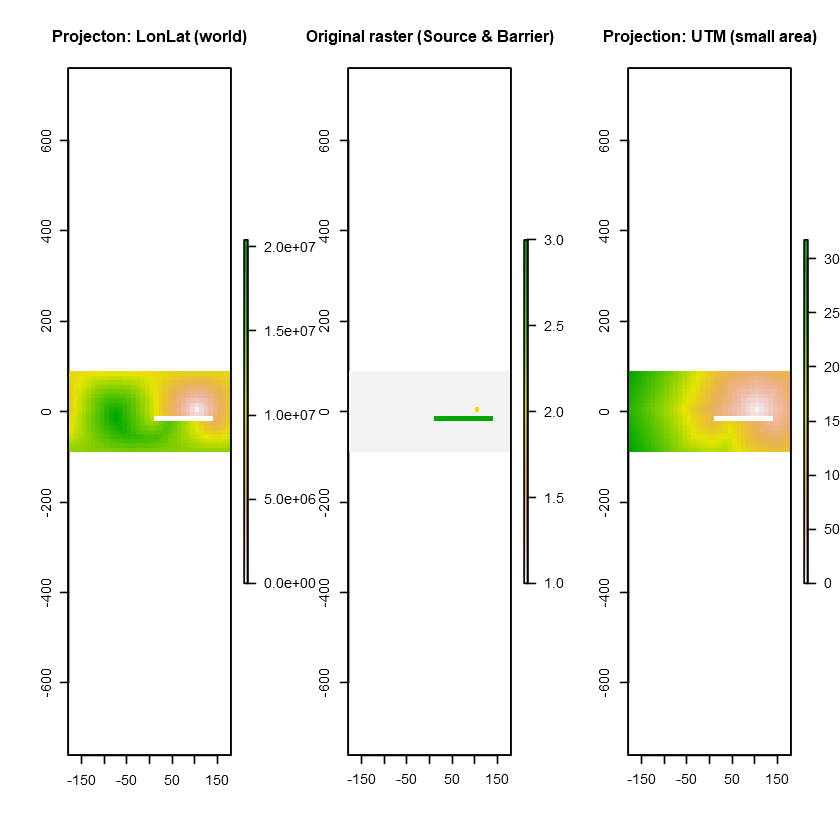

In [50]:

# Projection: 'lonlat' (world)
# ----------------------------
r = raster(ncol=18*2,nrow=9*2) # 1 cell for each 10x10 degrees
r[] = 1
r[317] = 2
r[380:392] = 3
dist.lonlat = gridDistance(r,origin=2,omit=3) 

# Projection: 'utm' (small area)
# ------------------------------
projection(r) = "+proj=utm +zone=15 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"
dist.utm = gridDistance(r,origin=2,omit=3) 

# Plot results
# ------------
par(mfrow=c(1,3))
plot(dist.lonlat, main="Projecton: LonLat (world)")
plot(r, main="Original raster (Source & Barrier)")
plot(dist.utm, main="Projection: UTM (small area)")



### Direction functions

`direction`: Computes the direction (azimuth) toward (or from) the nearest cell that is not NA. Important arguments:

* 'from':
  * FALSE (default): Computes the direction to the nearest cell that is not NA.
  * TRUE: Computes the direction from the nearest cell that is not NA.
* `degrees`:
	* FALSE (default): Computes the direction in radians (i.e. unit of direction: radians).
	* TRUE: Computes the direction in degrees (i.e. unit of direction: degrees).


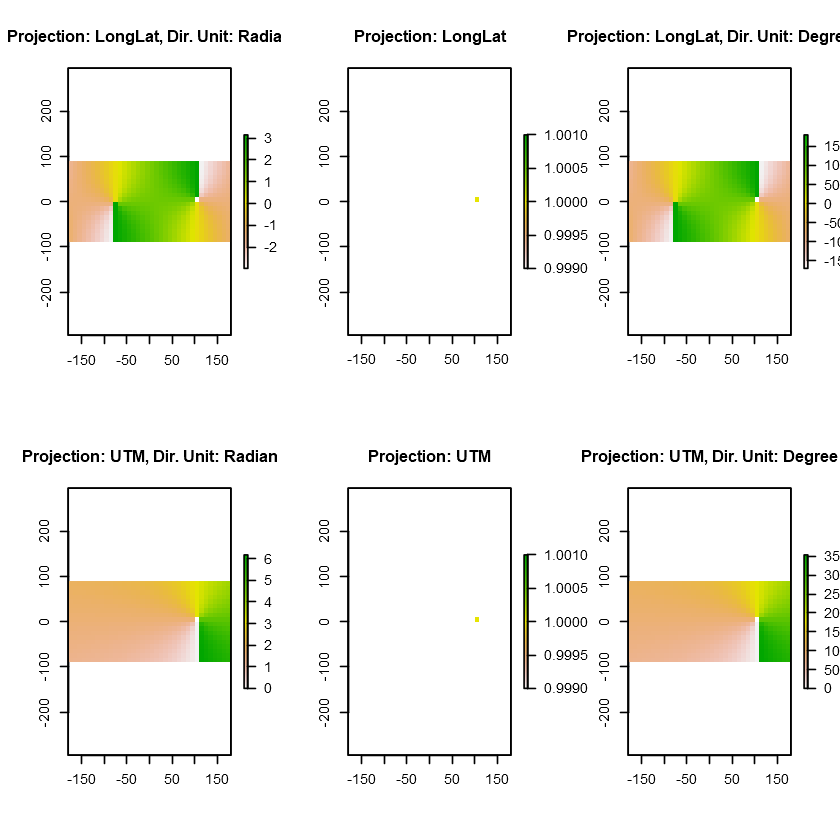

In [51]:

# Projection: LongLat
r.longlat = raster(ncol=18*2,nrow=9*2) # 1 cell for each 10x10 degrees
r.longlat[] = NA
r.longlat[317] = 1
dir.longlat.rad = direction(r.longlat)  # Computes Direction in Radians
dir.longlat.deg = direction(r.longlat, degrees=TRUE) # Computes Direction in Degrees

# Projection: UTM
r.utm = r.longlat
projection(r.utm) = "+proj=utm +zone=15 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"
dir.utm.rad = direction(r.utm)  # Computes Direction in Radians
dir.utm.deg = direction(r.utm, degrees=TRUE) # Computes Direction in Degrees

# Plot results
par(mfrow=c(2,3))
plot(dir.longlat.rad, main="Projection: LongLat, Dir. Unit: Radian")
plot(r.longlat, main="Projection: LongLat")
plot(dir.longlat.deg, main="Projection: LongLat, Dir. Unit: Degree")
plot(dir.utm.rad, main="Projection: UTM, Dir. Unit: Radian")
plot(r.utm, main="Projection: UTM")
plot(dir.utm.deg, main="Projection: UTM, Dir. Unit: Degree")



## Spatial autocorrelation Raster

To compute measures of autocorrelation in a RasterLayer, two autocorrelation measures are available: Moran's I and Geary's C.Both can be computed: Globally (returns a number) or Locally (returns a RasterLayer object). They use weights defined by a matrix, as in 'focal' (see above 'Summarizing values in a "moving window"'). The Weights Shape and Size can be changed. The default is: 'w=matrix(c(1,1,1,1,0,1,1,1,1), 3,3)'; i.e. a 3x3 matrix.


[1] 0.682477

[1] 0.5820492

[1] 0.2155071

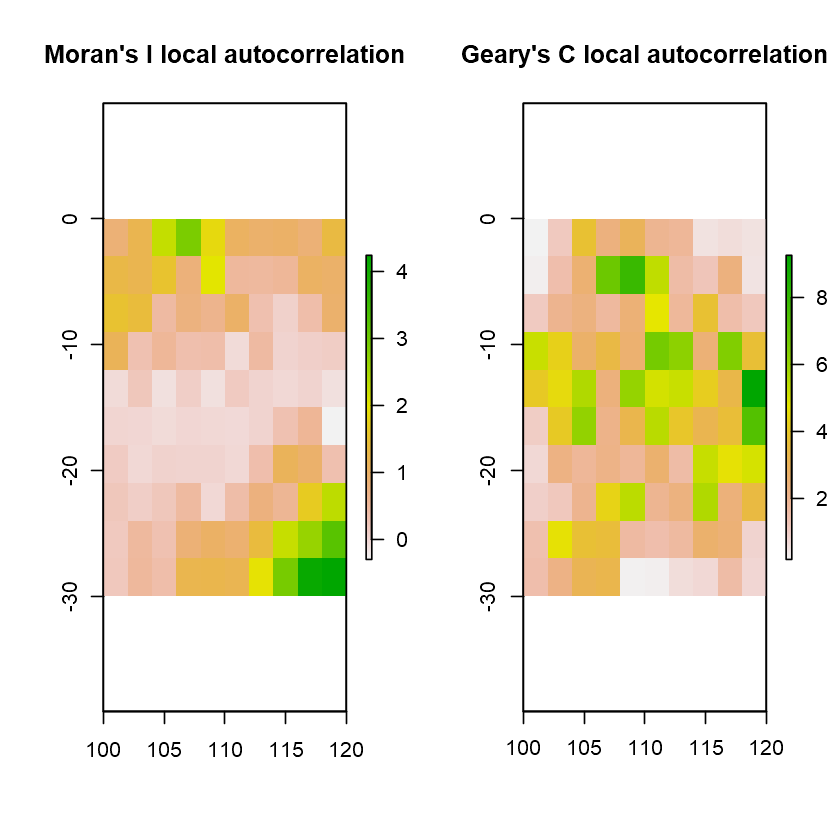

In [52]:

# Global autocorrelation
Moran(r2b.elev)
Moran(r2b.elev, w=matrix(c(rep(1,12),0,rep(1,12)), nrow=5)) 
Geary(r2b.elev)

# Local autocorrelation
par(mfrow=c(1,2))
plot(MoranLocal(r2b.elev), main="Moran's I local autocorrelation" )
plot(GearyLocal(r2b.elev), main="Geary's C local autocorrelation"  )



## Elevation, slope, aspect

Slope & aspect can be computed with function `terrain`.


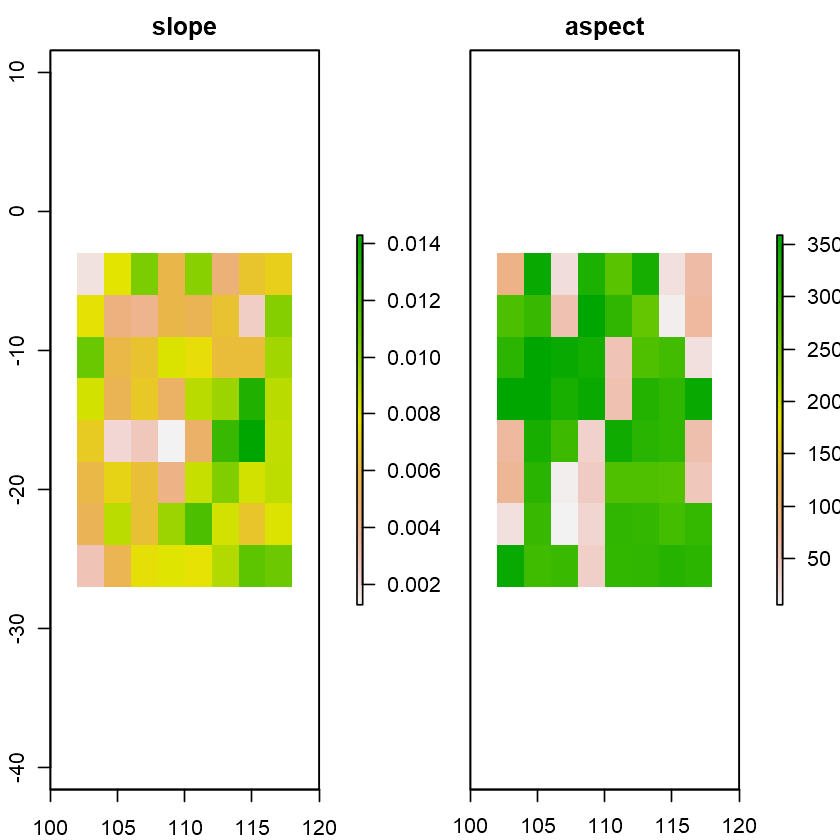

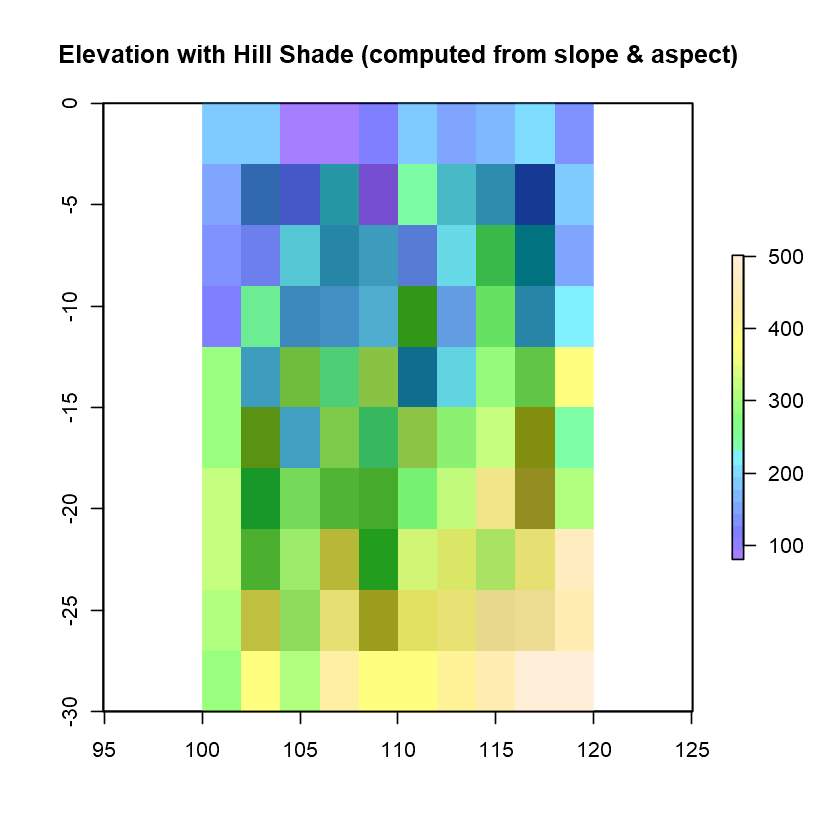

In [53]:
# Basic maps
r2b.slo.asp.deg.ras = terrain(r2b.elev, opt = c("slope", "aspect"), unit = "degrees")
#plot(r2b.elev)
plot(r2b.slo.asp.deg.ras)

# Compute: Slope & Aspect
r2b.slope = terrain(r2b.elev, opt = "Slope")
r2b.aspect = terrain(r2b.elev, opt = "Aspect")

# Nicer plot
  # Compute hill shade from Slope and Aspect layers (both in radians). 
r2b.hillShade = hillShade(r2b.slope, r2b.aspect, 40, 270)
  # Plot Hill Shade layer as a backdrop and then Elevation on top as a semi-transparent layer. 
plot(r2b.hillShade, col = grey(0:100/100), legend = FALSE, main="Elevation with Hill Shade (computed from slope & aspect)")
plot(r2b.elev, col = topo.colors(25, alpha = 0.5), add = TRUE) # 'alpha': Transparency channel, range=[0,1] (0=transparent, 1=opaque)

In [54]:

# THE END
